# NYC311 Service Request Analysis 

## Problem Statement 

#### NYC 311's mission is to provide the public with quick and easy access to all New York City government services and information while offering the best customer service. Each day, NYC311 receives thousands of requests related to several hundred types of non-emergency services, including noise complaints, plumbing issues, and illegally parked cars. These requests are received by NYC311 and forwarded to the relevant agencies such as the police, buildings, or transportation. The agency responds to the request, addresses it, and then closes it.

#### Our objective will be to perform a service request data analysis of New York City 311 calls. And while doing the analysis will try to understand the pattern in the data and also visualize the major complaint types.

## Importing libraries and dataset 

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
nyc311_data=pd.read_csv(r'C:\Users\RitwikBijalwan_25\project_work\python\311_Service_Requests_from_2010_to_Present.csv',low_memory=False)

In [4]:
nyc311_data.head(2)

Unique Key            Created Date    Closed Date Agency  \
0    32310363  12/31/2015 11:59:45 PM  01-01-16 0:55   NYPD   
1    32309934  12/31/2015 11:59:44 PM  01-01-16 1:26   NYPD   

                       Agency Name           Complaint Type        Descriptor  \
0  New York City Police Department  Noise - Street/Sidewalk  Loud Music/Party   
1  New York City Police Department         Blocked Driveway         No Access   

     Location Type  Incident Zip     Incident Address  ...  \
0  Street/Sidewalk       10034.0  71 VERMILYEA AVENUE  ...   
1  Street/Sidewalk       11105.0      27-07 23 AVENUE  ...   

  Bridge Highway Name Bridge Highway Direction Road Ramp  \
0                 NaN                      NaN       NaN   
1                 NaN                      NaN       NaN   

  Bridge Highway Segment Garage Lot Name Ferry Direction Ferry Terminal Name  \
0                    NaN             NaN             NaN                 NaN   
1                    NaN             NaN             NaN                 NaN   

    Latitude  Longitude                                  Location  
0  40.865682 -73.923501   (40.86568153633767, -73.92350095571744)  
1  40.775945 -73.915094  (40.775945312321085, -73.91509393898605)  

[2 rows x 53 columns]

#### Here we have one column as Unique key. Lets check if it is really unique or contain any duplicate value. If it contains no duplicate values, then we can use this column as index of dataframe.
#### Also, our dataframe appeared in condensed form. If we want to expand it so that each column or each row or both rows and columns are visible, we can use set_option function of pandas.

In [5]:
nyc311_data['Unique Key'].duplicated().sum()

0

In [6]:
nyc311_data.set_index('Unique Key',inplace=True,verify_integrity=True)

In [7]:
nyc311_data.head(2)

Created Date    Closed Date Agency  \
Unique Key                                                 
32310363    12/31/2015 11:59:45 PM  01-01-16 0:55   NYPD   
32309934    12/31/2015 11:59:44 PM  01-01-16 1:26   NYPD   

                                Agency Name           Complaint Type  \
Unique Key                                                             
32310363    New York City Police Department  Noise - Street/Sidewalk   
32309934    New York City Police Department         Blocked Driveway   

                  Descriptor    Location Type  Incident Zip  \
Unique Key                                                    
32310363    Loud Music/Party  Street/Sidewalk       10034.0   
32309934           No Access  Street/Sidewalk       11105.0   

               Incident Address       Street Name  ... Bridge Highway Name  \
Unique Key                                         ...                       
32310363    71 VERMILYEA AVENUE  VERMILYEA AVENUE  ...                 NaN   
32309934        27-07 23 AVENUE         23 AVENUE  ...                 NaN   

           Bridge Highway Direction Road Ramp Bridge Highway Segment  \
Unique Key                                                             
32310363                        NaN       NaN                    NaN   
32309934                        NaN       NaN                    NaN   

           Garage Lot Name Ferry Direction Ferry Terminal Name   Latitude  \
Unique Key                                                                  
32310363               NaN             NaN                 NaN  40.865682   
32309934               NaN             NaN                 NaN  40.775945   

            Longitude                                  Location  
Unique Key                                                       
32310363   -73.923501   (40.86568153633767, -73.92350095571744)  
32309934   -73.915094  (40.775945312321085, -73.91509393898605)  

[2 rows x 52 columns]

In [8]:
# To view every column name (in expanded form)
pd.set_option('display.max_columns()',None)

In [9]:
nyc311_data.head(2)

Created Date    Closed Date Agency  \
Unique Key                                                 
32310363    12/31/2015 11:59:45 PM  01-01-16 0:55   NYPD   
32309934    12/31/2015 11:59:44 PM  01-01-16 1:26   NYPD   

                                Agency Name           Complaint Type  \
Unique Key                                                             
32310363    New York City Police Department  Noise - Street/Sidewalk   
32309934    New York City Police Department         Blocked Driveway   

                  Descriptor    Location Type  Incident Zip  \
Unique Key                                                    
32310363    Loud Music/Party  Street/Sidewalk       10034.0   
32309934           No Access  Street/Sidewalk       11105.0   

               Incident Address       Street Name  Cross Street 1  \
Unique Key                                                          
32310363    71 VERMILYEA AVENUE  VERMILYEA AVENUE  ACADEMY STREET   
32309934        27-07 23 AVENUE         23 AVENUE       27 STREET   

             Cross Street 2 Intersection Street 1 Intersection Street 2  \
Unique Key                                                                
32310363    WEST 204 STREET                   NaN                   NaN   
32309934          28 STREET                   NaN                   NaN   

           Address Type      City Landmark Facility Type  Status  \
Unique Key                                                         
32310363        ADDRESS  NEW YORK      NaN      Precinct  Closed   
32309934        ADDRESS   ASTORIA      NaN      Precinct  Closed   

                 Due Date                             Resolution Description  \
Unique Key                                                                     
32310363    01-01-16 7:59  The Police Department responded and upon arriv...   
32309934    01-01-16 7:59  The Police Department responded to the complai...   

           Resolution Action Updated Date Community Board    Borough  \
Unique Key                                                             
32310363                    01-01-16 0:55    12 MANHATTAN  MANHATTAN   
32309934                    01-01-16 1:26       01 QUEENS     QUEENS   

            X Coordinate (State Plane)  Y Coordinate (State Plane)  \
Unique Key                                                           
32310363                     1005409.0                    254678.0   
32309934                     1007766.0                    221986.0   

           Park Facility Name Park Borough  School Name School Number  \
Unique Key                                                              
32310363          Unspecified    MANHATTAN  Unspecified   Unspecified   
32309934          Unspecified       QUEENS  Unspecified   Unspecified   

           School Region  School Code School Phone Number School Address  \
Unique Key                                                                 
32310363     Unspecified  Unspecified         Unspecified    Unspecified   
32309934     Unspecified  Unspecified         Unspecified    Unspecified   

            School City School State   School Zip School Not Found  \
Unique Key                                                           
32310363    Unspecified  Unspecified  Unspecified                N   
32309934    Unspecified  Unspecified  Unspecified                N   

            School or Citywide Complaint  Vehicle Type  Taxi Company Borough  \
Unique Key                                                                     
32310363                             NaN           NaN                   NaN   
32309934                             NaN           NaN                   NaN   

            Taxi Pick Up Location Bridge Highway Name  \
Unique Key                                              
32310363                      NaN                 NaN   
32309934                      NaN                 NaN   

           Bridge Highway Direction Road Ramp Bridge Highway Segment

#### From here onwards whenever we create any other dataframe or perform any operation on the dataframe, we will be allowed to get into all the columns present in that dataframe (whether they are few or many in quantities). 

In [10]:
# Shape of the dataset (rows X columns)
nyc311_data.shape

(300698, 52)

In [11]:
# Information about the columns (column name, non-null values, datatype of column)
nyc311_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300698 entries, 32310363 to 30281825
Data columns (total 52 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Created Date                    300698 non-null  object 
 1   Closed Date                     298534 non-null  object 
 2   Agency                          300698 non-null  object 
 3   Agency Name                     300698 non-null  object 
 4   Complaint Type                  300698 non-null  object 
 5   Descriptor                      294784 non-null  object 
 6   Location Type                   300567 non-null  object 
 7   Incident Zip                    298083 non-null  float64
 8   Incident Address                256288 non-null  object 
 9   Street Name                     256288 non-null  object 
 10  Cross Street 1                  251419 non-null  object 
 11  Cross Street 2                  250919 non-null  object 
 12  Interse

#### In our dataset, columns like created Date, Closed Date, Due Date  and Resolution Action Update Date are of type object ("string"), but they should actually be of type datetime as they represents date and time rather than being a string. So, we will convert them to datetime type.

In [12]:
nyc311_data['Created Date']=pd.to_datetime(nyc311_data['Created Date'])
nyc311_data['Closed Date']=pd.to_datetime(nyc311_data['Closed Date'])
nyc311_data['Due Date']=pd.to_datetime(nyc311_data['Due Date'])
nyc311_data['Resolution Action Updated Date']=pd.to_datetime(nyc311_data['Resolution Action Updated Date'])

In [13]:
# Confirming the changes
nyc311_data[['Created Date','Closed Date','Due Date',\
             'Resolution Action Updated Date']].dtypes

Created Date                      datetime64[ns]
Closed Date                       datetime64[ns]
Due Date                          datetime64[ns]
Resolution Action Updated Date    datetime64[ns]
dtype: object

In [14]:
nyc311_data[['Created Date','Closed Date','Due Date',\
             'Resolution Action Updated Date']].head(2)

Created Date         Closed Date            Due Date  \
Unique Key                                                               
32310363   2015-12-31 23:59:45 2016-01-01 00:55:00 2016-01-01 07:59:00   
32309934   2015-12-31 23:59:44 2016-01-01 01:26:00 2016-01-01 07:59:00   

           Resolution Action Updated Date  
Unique Key                                 
32310363              2016-01-01 00:55:00  
32309934              2016-01-01 01:26:00

### Create a new column Request_Closing_Time that will represent time elapsed between creating date and closing date. 

In [15]:
nyc311_data['Request_Closing_Time']=(nyc311_data['Closed Date']-nyc311_data['Created Date'])

#nyc311_data['Request_Closing_Time_seconds']=((nyc311_data['Closed Date']-nyc311_data['Created Date']).dt.seconds)

nyc311_data['Request_Closing_Time_hours']=((nyc311_data['Closed Date']-nyc311_data['Created Date']).dt.seconds)/3600

nyc311_data['Request_Closing_Time_days']=((nyc311_data['Closed Date']-nyc311_data['Created Date']).dt.days)

# including positive difference only and without any nulls
#nyc311_data=(nyc311_data[nyc311_data['Request_Closing_Time_seconds'].notnull()])
nyc311_data=(nyc311_data[nyc311_data['Request_Closing_Time_hours'].notnull()])
#nyc311_data=(nyc311_data[nyc311_data['Request_Closing_Time_days'].notnull()])

#nyc311_data['Request_Closing_Time_seconds']=(nyc311_data['Request_Closing_Time_seconds']).astype('int64')
nyc311_data['Request_Closing_Time_hours']=round(nyc311_data['Request_Closing_Time_hours']).astype('int64')
nyc311_data['Request_Closing_Time_days']=(nyc311_data['Request_Closing_Time_days']).astype('int64')

nyc311_data=nyc311_data[nyc311_data['Closed Date']>=nyc311_data['Created Date']]

nyc311_data[['Created Date','Closed Date','Due Date','Resolution Action Updated Date','Request_Closing_Time',\
             'Request_Closing_Time_hours','Request_Closing_Time_days']].head(3)

Created Date         Closed Date            Due Date  \
Unique Key                                                               
32310363   2015-12-31 23:59:45 2016-01-01 00:55:00 2016-01-01 07:59:00   
32309934   2015-12-31 23:59:44 2016-01-01 01:26:00 2016-01-01 07:59:00   
32309159   2015-12-31 23:59:29 2016-01-01 04:51:00 2016-01-01 07:59:00   

           Resolution Action Updated Date Request_Closing_Time  \
Unique Key                                                       
32310363              2016-01-01 00:55:00      0 days 00:55:15   
32309934              2016-01-01 01:26:00      0 days 01:26:16   
32309159              2016-01-01 04:51:00      0 days 04:51:31   

            Request_Closing_Time_hours  Request_Closing_Time_days  
Unique Key                                                         
32310363                             1                          0  
32309934                             1                          0  
32309159                             5                          0

#### NOTE -> Here we have rounded the values of hours to nearest approximations. For example, if value of resolution closing time is below .5 (like 1.098 or 8.243 or some value less than .5 decimals) then it is rounded to floor value whereas if value is above .5 (like 3.8972 or 0.95 or some value greater than .5 decimals) then it is rounded to cieling value.

In [16]:
nyc311_data[['Created Date','Closed Date','Due Date','Resolution Action Updated Date','Request_Closing_Time',\
             'Request_Closing_Time_hours','Request_Closing_Time_days']].isna().sum()

Created Date                       0
Closed Date                        0
Due Date                           1
Resolution Action Updated Date    39
Request_Closing_Time               0
Request_Closing_Time_hours         0
Request_Closing_Time_days          0
dtype: int64

In [17]:
nyc311_data=nyc311_data[nyc311_data['Due Date'].isna()==False]

In [18]:
nyc311_data=nyc311_data[nyc311_data['Resolution Action Updated Date'].isna()==False]

In [19]:
nyc311_data.shape[0]

298495

In [20]:
nyc311_data.head(2)

Created Date         Closed Date Agency  \
Unique Key                                                  
32310363   2015-12-31 23:59:45 2016-01-01 00:55:00   NYPD   
32309934   2015-12-31 23:59:44 2016-01-01 01:26:00   NYPD   

                                Agency Name           Complaint Type  \
Unique Key                                                             
32310363    New York City Police Department  Noise - Street/Sidewalk   
32309934    New York City Police Department         Blocked Driveway   

                  Descriptor    Location Type  Incident Zip  \
Unique Key                                                    
32310363    Loud Music/Party  Street/Sidewalk       10034.0   
32309934           No Access  Street/Sidewalk       11105.0   

               Incident Address       Street Name  Cross Street 1  \
Unique Key                                                          
32310363    71 VERMILYEA AVENUE  VERMILYEA AVENUE  ACADEMY STREET   
32309934        27-07 23 AVENUE         23 AVENUE       27 STREET   

             Cross Street 2 Intersection Street 1 Intersection Street 2  \
Unique Key                                                                
32310363    WEST 204 STREET                   NaN                   NaN   
32309934          28 STREET                   NaN                   NaN   

           Address Type      City Landmark Facility Type  Status  \
Unique Key                                                         
32310363        ADDRESS  NEW YORK      NaN      Precinct  Closed   
32309934        ADDRESS   ASTORIA      NaN      Precinct  Closed   

                      Due Date  \
Unique Key                       
32310363   2016-01-01 07:59:00   
32309934   2016-01-01 07:59:00   

                                       Resolution Description  \
Unique Key                                                      
32310363    The Police Department responded and upon arriv...   
32309934    The Police Department responded to the complai...   

           Resolution Action Updated Date Community Board    Borough  \
Unique Key                                                             
32310363              2016-01-01 00:55:00    12 MANHATTAN  MANHATTAN   
32309934              2016-01-01 01:26:00       01 QUEENS     QUEENS   

            X Coordinate (State Plane)  Y Coordinate (State Plane)  \
Unique Key                                                           
32310363                     1005409.0                    254678.0   
32309934                     1007766.0                    221986.0   

           Park Facility Name Park Borough  School Name School Number  \
Unique Key                                                              
32310363          Unspecified    MANHATTAN  Unspecified   Unspecified   
32309934          Unspecified       QUEENS  Unspecified   Unspecified   

           School Region  School Code School Phone Number School Address  \
Unique Key                                                                 
32310363     Unspecified  Unspecified         Unspecified    Unspecified   
32309934     Unspecified  Unspecified         Unspecified    Unspecified   

            School City School State   School Zip School Not Found  \
Unique Key                                                           
32310363    Unspecified  Unspecified  Unspecified                N   
32309934    Unspecified  Unspecified  Unspecified                N   

            School or Citywide Complaint  Vehicle Type  Taxi Company Borough  \
Unique Key                                                                     
32310363                             NaN           NaN                   NaN   
32309934                             NaN           NaN                   NaN   

            Taxi Pick Up Location Bridge Highway Name  \
Unique Key                                              
32310363                      NaN                 NaN   
32309934                      NaN        

In [21]:
nyc311_data.shape

(298495, 55)

### Missing Values and Treatment 

In [22]:
for i in nyc311_data.columns:
    if(nyc311_data[i].isna().any()==True):
        print('column:',i,'\t','missing values:',nyc311_data[i].isna().sum(),'\t',\
              'missing value percent:',(nyc311_data[i].isna().sum()/len(nyc311_data))*100,'\n')

column: Descriptor 	 missing values: 5907 	 missing value percent: 1.9789276202281447 

column: Location Type 	 missing values: 91 	 missing value percent: 0.030486272801889477 

column: Incident Zip 	 missing values: 507 	 missing value percent: 0.16985209132481283 

column: Incident Address 	 missing values: 44390 	 missing value percent: 14.871270875559054 

column: Street Name 	 missing values: 44390 	 missing value percent: 14.871270875559054 

column: Cross Street 1 	 missing values: 47556 	 missing value percent: 15.931925157875341 

column: Cross Street 2 	 missing values: 47646 	 missing value percent: 15.962076416690396 

column: Intersection Street 1 	 missing values: 255062 	 missing value percent: 85.44933750984104 

column: Intersection Street 2 	 missing values: 255148 	 missing value percent: 85.47814871270876 

column: Address Type 	 missing values: 707 	 missing value percent: 0.23685488869160287 

column: City 	 missing values: 506 	 missing value percent: 0.16951707

#### Lets first drop columns with quite high percentages of missing values. 

In [23]:
rmv_col=['Ferry Terminal Name','Ferry Direction','Garage Lot Name','Bridge Highway Segment',\
        'Road Ramp','Bridge Highway Direction','Bridge Highway Name','Taxi Pick Up Location',\
        'Taxi Company Borough','Vehicle Type','School or Citywide Complaint','Landmark','Intersection Street 2',\
        'Intersection Street 1']
nyc311_data.drop(rmv_col,axis=1,inplace=True)

In [24]:
nyc311_data.shape

(298495, 41)

In [25]:
for i in nyc311_data.columns:
    if(nyc311_data[i].isna().any()==True):
        print('column:',i,'\t','missing values:',nyc311_data[i].isna().sum(),'\t',\
              'missing value percent:',(nyc311_data[i].isna().sum()/len(nyc311_data))*100,'\n')

column: Descriptor 	 missing values: 5907 	 missing value percent: 1.9789276202281447 

column: Location Type 	 missing values: 91 	 missing value percent: 0.030486272801889477 

column: Incident Zip 	 missing values: 507 	 missing value percent: 0.16985209132481283 

column: Incident Address 	 missing values: 44390 	 missing value percent: 14.871270875559054 

column: Street Name 	 missing values: 44390 	 missing value percent: 14.871270875559054 

column: Cross Street 1 	 missing values: 47556 	 missing value percent: 15.931925157875341 

column: Cross Street 2 	 missing values: 47646 	 missing value percent: 15.962076416690396 

column: Address Type 	 missing values: 707 	 missing value percent: 0.23685488869160287 

column: City 	 missing values: 506 	 missing value percent: 0.16951707733797886 

column: Facility Type 	 missing values: 14 	 missing value percent: 0.0046901958156753045 

column: X Coordinate (State Plane) 	 missing values: 1432 	 missing value percent: 0.47974002914

In [26]:
for i in nyc311_data.columns:
    print(i,'\n',nyc311_data[i].value_counts(),'\n\n')

Created Date 
 2015-07-11 23:04:00    9
2015-11-06 23:34:00    9
2015-06-06 22:23:00    9
2015-07-03 22:28:00    8
2015-04-03 23:46:00    8
                      ..
2015-11-28 23:28:30    1
2015-09-29 12:06:26    1
2015-04-11 08:49:00    1
2015-09-27 23:27:04    1
2015-11-23 22:05:13    1
Name: Created Date, Length: 257705, dtype: int64 


Closed Date 
 2015-11-08 07:34:00    24
2015-10-11 07:03:00    22
2015-12-08 07:44:00    18
2015-05-10 07:01:00    18
2015-12-07 23:17:00    17
                       ..
2015-09-30 04:34:09     1
2015-09-08 18:14:00     1
2015-06-16 00:08:03     1
2015-04-26 01:32:49     1
2015-11-23 22:05:13     1
Name: Closed Date, Length: 237129, dtype: int64 


Agency 
 NYPD    298495
Name: Agency, dtype: int64 


Agency Name 
 New York City Police Department    298489
Internal Affairs Bureau                 6
Name: Agency Name, dtype: int64 


Complaint Type 
 Blocked Driveway             76804
Illegal Parking              74521
Noise - Street/Sidewalk      4806

In [27]:
# dropping further columns
rmv_column=['Location','School Not Found','School Zip','School State','School City',\
                  'School Address','School Phone Number','School Code','School Region','School Number',\
                  'School Name','Park Facility Name','Facility Type','Park Borough','Agency']
nyc311_data.drop(rmv_column,axis=1,inplace=True)

In [28]:
for i in nyc311_data.columns:
    if(nyc311_data[i].isna().any()==True):
        print('column:',i,'\t','missing values:',nyc311_data[i].isna().sum(),'\t',\
              'missing value percent:',(nyc311_data[i].isna().sum()/len(nyc311_data))*100,'\n')

column: Descriptor 	 missing values: 5907 	 missing value percent: 1.9789276202281447 

column: Location Type 	 missing values: 91 	 missing value percent: 0.030486272801889477 

column: Incident Zip 	 missing values: 507 	 missing value percent: 0.16985209132481283 

column: Incident Address 	 missing values: 44390 	 missing value percent: 14.871270875559054 

column: Street Name 	 missing values: 44390 	 missing value percent: 14.871270875559054 

column: Cross Street 1 	 missing values: 47556 	 missing value percent: 15.931925157875341 

column: Cross Street 2 	 missing values: 47646 	 missing value percent: 15.962076416690396 

column: Address Type 	 missing values: 707 	 missing value percent: 0.23685488869160287 

column: City 	 missing values: 506 	 missing value percent: 0.16951707733797886 

column: X Coordinate (State Plane) 	 missing values: 1432 	 missing value percent: 0.4797400291462169 

column: Y Coordinate (State Plane) 	 missing values: 1432 	 missing value percent: 0

In [29]:
nyc311_data.shape

(298495, 26)

In [30]:
nyc311_data_1=nyc311_data.copy()

In [31]:
nyc311_data_1.shape

(298495, 26)

#### As the number of missing values are comparatively higher for Incident Address, Street Name, Cross Street 1 and Cross Street 2, and they are all string type, so we can impute them with Not_given, whereas rest of columns have missing values less than 5%, so we can drop such values. 

In [32]:
for i in nyc311_data_1.columns:
    if(((nyc311_data_1[i].isna().sum()/len(nyc311_data_1))*100)<3.0):
       nyc311_data_1=nyc311_data_1[nyc311_data_1[i].isna()==False]
    else:
       nyc311_data_1[i].replace({np.nan:'Not_given'},inplace=True)

In [33]:
nyc311_data_1.shape

(290885, 26)

In [34]:
for i in nyc311_data_1.columns:
    print(i,'\n',nyc311_data_1[i].unique(),'\n\n')

Created Date 
 ['2015-12-31T23:59:45.000000000' '2015-12-31T23:59:44.000000000'
 '2015-12-31T23:59:29.000000000' ... '2015-03-29T00:33:03.000000000'
 '2015-03-29T00:33:02.000000000' '2015-03-29T00:33:01.000000000'] 


Closed Date 
 ['2016-01-01T00:55:00.000000000' '2016-01-01T01:26:00.000000000'
 '2016-01-01T04:51:00.000000000' ... '2015-03-29T02:33:59.000000000'
 '2015-03-29T04:38:35.000000000' '2015-03-29T04:41:50.000000000'] 


Agency Name 
 ['New York City Police Department'] 


Complaint Type 
 ['Noise - Street/Sidewalk' 'Blocked Driveway' 'Illegal Parking'
 'Derelict Vehicle' 'Noise - Commercial' 'Noise - House of Worship'
 'Posting Advertisement' 'Noise - Vehicle' 'Animal Abuse' 'Vending'
 'Traffic' 'Drinking' 'Noise - Park' 'Graffiti' 'Disorderly Youth'] 


Descriptor 
 ['Loud Music/Party' 'No Access' 'Commercial Overnight Parking'
 'Blocked Sidewalk' 'Posted Parking Sign Violation' 'Blocked Hydrant'
 'With License Plate' 'Partial Access' 'Unauthorized Bus Layover'
 'Double Par

#### We are having exceptional zip code value of 83 and some of the  city names repeated due to case mismatch which we need to handle.

In [35]:
nyc311_data_1[nyc311_data_1['City']=='CENTRAL PARK'][['Incident Zip','Incident Address']].value_counts()

Incident Zip  Incident Address     
83.0          THE MALL                 68
              TERRACE DRIVE            14
              Not_given                 9
              CENTRAL PARK S            2
              5TH AVENUE                2
              DUKE ELLINGTON CIRCLE     1
              CENTER DRIVE              1
dtype: int64

In [36]:
nyc311_data_1[(nyc311_data_1['City']=='CENTRAL PARK')][['Incident Zip','Incident Address','X Coordinate (State Plane)','Y Coordinate (State Plane)','Latitude','Longitude']].value_counts()

Incident Zip  Incident Address       X Coordinate (State Plane)  Y Coordinate (State Plane)  Latitude   Longitude 
83.0          THE MALL               992119.0                    220666.0                    40.772350  -73.971590    24
                                     992118.0                    220666.0                    40.772350  -73.971594    24
                                     992034.0                    220381.0                    40.771568  -73.971897    19
              TERRACE DRIVE          992199.0                    221172.0                    40.773739  -73.971301    14
              Not_given              994350.0                    223157.0                    40.779185  -73.963532     8
              5TH AVENUE             998050.0                    229135.0                    40.795588  -73.950159     2
              THE MALL               991953.0                    220113.0                    40.770832  -73.972190     1
              Not_given              9

#### From above table and investigating through web, it is found that only THE MALL incident address has two different zips for requests registered whereas rest of the incident addresses have single value for their zips as per their latitude and longitude in CENTRAL PARK region of MANHATTAN borough. 

In [37]:
def zip_imp(data):
    address=data[0]
    x_plane=data[1]
    zip=data[2]
    
    if (address=='THE MALL'):
        if((x_plane==992119) | (x_plane==992118)):
            return 10022
        else:
            return 10019
    else:
        return zip

In [38]:
nyc311_data_1['Incident Zip']=nyc311_data_1[['Incident Address','X Coordinate (State Plane)','Incident Zip']].apply(zip_imp,axis=1)
nyc311_data_1[nyc311_data_1['City']=='CENTRAL PARK'][['Incident Zip','Incident Address','Latitude','Longitude']].value_counts()

Incident Zip  Incident Address       Latitude   Longitude 
10022.0       THE MALL               40.772350  -73.971590    24
                                                -73.971594    24
10019.0       THE MALL               40.771568  -73.971897    19
83.0          TERRACE DRIVE          40.773739  -73.971301    14
              Not_given              40.779185  -73.963532     8
              5TH AVENUE             40.795588  -73.950159     2
10019.0       THE MALL               40.770832  -73.972190     1
83.0          Not_given              40.777999  -73.963388     1
              DUKE ELLINGTON CIRCLE  40.796636  -73.949404     1
              CENTRAL PARK S         40.764528  -73.973507     1
                                     40.764426  -73.973283     1
              CENTER DRIVE           40.773525  -73.972806     1
dtype: int64

In [39]:
nyc311_data_1['Incident Zip'][nyc311_data_1['Incident Address']=='DUKE ELLINGTON CIRCLE']=10029.0

nyc311_data_1['Incident Zip'][nyc311_data_1['Incident Address']=='5TH AVENUE']=10029.0
                                                                 
nyc311_data_1['Incident Zip'][nyc311_data_1['Incident Address']=='TERRACE DRIVE']=10019.0
                                                                 
nyc311_data_1['Incident Zip'][nyc311_data_1['Incident Address']=='CENTRAL PARK S']=10019.0
                                                                 
nyc311_data_1['Incident Zip'][nyc311_data_1['Incident Address']=='CENTER DRIVE']=10023.0

In [40]:
nyc311_data_1[(nyc311_data_1['City']=='CENTRAL PARK')][['Incident Zip','Incident Address','X Coordinate (State Plane)','Y Coordinate (State Plane)','Latitude','Longitude']].value_counts()

Incident Zip  Incident Address       X Coordinate (State Plane)  Y Coordinate (State Plane)  Latitude   Longitude 
10022.0       THE MALL               992119.0                    220666.0                    40.772350  -73.971590    24
                                     992118.0                    220666.0                    40.772350  -73.971594    24
10019.0       THE MALL               992034.0                    220381.0                    40.771568  -73.971897    19
              TERRACE DRIVE          992199.0                    221172.0                    40.773739  -73.971301    14
83.0          Not_given              994350.0                    223157.0                    40.779185  -73.963532     8
10029.0       5TH AVENUE             998050.0                    229135.0                    40.795588  -73.950159     2
              DUKE ELLINGTON CIRCLE  998259.0                    229517.0                    40.796636  -73.949404     1
10023.0       CENTER DRIVE           9

In [41]:
nyc311_data_1['Incident Zip'].unique()

array([10034., 11105., 10458., 10461., 11373., 11215., 10032., 10457.,
       11415., 11219., 11372., 10453., 11208., 11379., 11374., 11412.,
       11217., 11234., 10026., 10456., 10030., 10467., 11432., 10031.,
       11419., 10024., 11201., 11216., 10462., 11385., 11414., 11213.,
       11375., 11211., 10312., 10017., 11417., 10002., 10027., 11209.,
       10035., 11418., 11421., 11205., 10468., 11355., 11358., 11210.,
       11368., 11427., 11436., 10308., 11364., 10011., 11423., 11230.,
       10003., 11221., 11416., 11378., 11236., 11218., 10029., 10028.,
       11214., 11207., 11369., 11223., 11220., 10302., 11420., 11354.,
       10473., 10301., 11103., 10465., 11377., 11212., 11365., 10472.,
       10452., 11203., 10469., 11237., 11434., 11101., 10460., 11229.,
       11206., 11102., 10466., 10009., 10033., 11694., 10022., 10470.,
       11433., 11428., 11413., 10463., 10471., 10474., 11228., 10014.,
       10475., 11225., 11233., 11370., 11204., 11435., 10459., 11238.,
      

In [42]:
# Excluding all records with incident zip of 83 (as removal of records with zip value 83 would not affect data quality much)
nyc311_data_1['Incident Zip']=nyc311_data_1['Incident Zip'].astype('int64')
nyc311_data_1[nyc311_data_1['Incident Zip']==83]['Incident Zip'].value_counts()

83    9
Name: Incident Zip, dtype: int64

In [43]:
nyc311_data_1=nyc311_data_1[nyc311_data_1['Incident Zip']!=83]
nyc311_data_1['Incident Zip'].shape[0]

290876

In [44]:
nyc311_data_1['Incident Zip'].unique()

array([10034, 11105, 10458, 10461, 11373, 11215, 10032, 10457, 11415,
       11219, 11372, 10453, 11208, 11379, 11374, 11412, 11217, 11234,
       10026, 10456, 10030, 10467, 11432, 10031, 11419, 10024, 11201,
       11216, 10462, 11385, 11414, 11213, 11375, 11211, 10312, 10017,
       11417, 10002, 10027, 11209, 10035, 11418, 11421, 11205, 10468,
       11355, 11358, 11210, 11368, 11427, 11436, 10308, 11364, 10011,
       11423, 11230, 10003, 11221, 11416, 11378, 11236, 11218, 10029,
       10028, 11214, 11207, 11369, 11223, 11220, 10302, 11420, 11354,
       10473, 10301, 11103, 10465, 11377, 11212, 11365, 10472, 10452,
       11203, 10469, 11237, 11434, 11101, 10460, 11229, 11206, 11102,
       10466, 10009, 10033, 11694, 10022, 10470, 11433, 11428, 11413,
       10463, 10471, 10474, 11228, 10014, 10475, 11225, 11233, 11370,
       11204, 11435, 10459, 11238, 10304, 11367, 10305, 10001, 10314,
       10019, 11222, 10023, 11356, 11235, 10018, 10036, 11106, 10075,
       10451, 11366,

In [45]:
nyc311_data_1.City.unique()

array(['NEW YORK', 'ASTORIA', 'BRONX', 'ELMHURST', 'BROOKLYN',
       'KEW GARDENS', 'JACKSON HEIGHTS', 'MIDDLE VILLAGE', 'REGO PARK',
       'SAINT ALBANS', 'JAMAICA', 'SOUTH RICHMOND HILL', 'RIDGEWOOD',
       'HOWARD BEACH', 'FOREST HILLS', 'STATEN ISLAND', 'OZONE PARK',
       'RICHMOND HILL', 'WOODHAVEN', 'FLUSHING', 'CORONA',
       'QUEENS VILLAGE', 'OAKLAND GARDENS', 'HOLLIS', 'MASPETH',
       'EAST ELMHURST', 'SOUTH OZONE PARK', 'WOODSIDE', 'FRESH MEADOWS',
       'LONG ISLAND CITY', 'ROCKAWAY PARK', 'SPRINGFIELD GARDENS',
       'COLLEGE POINT', 'BAYSIDE', 'GLEN OAKS', 'FAR ROCKAWAY',
       'BELLEROSE', 'LITTLE NECK', 'CAMBRIA HEIGHTS', 'ROSEDALE',
       'SUNNYSIDE', 'WHITESTONE', 'ARVERNE', 'FLORAL PARK',
       'NEW HYDE PARK', 'CENTRAL PARK', 'BREEZY POINT', 'QUEENS',
       'Astoria', 'Long Island City', 'Woodside', 'East Elmhurst',
       'Howard Beach'], dtype=object)

In [46]:
# Handling duplicated values in City column (also to bring values to same case)
def camel_case(named):
    named = named.split(' ')
    named = ' '.join([x.lower().capitalize() for x in named])
    return named

In [47]:
nyc311_data_1['City']=nyc311_data_1['City'].apply(camel_case)
nyc311_data_1['Incident Address']=nyc311_data_1['Incident Address'].apply(camel_case)
nyc311_data_1['Street Name']=nyc311_data_1['Street Name'].apply(camel_case)
nyc311_data_1['Cross Street 1']=nyc311_data_1['Cross Street 1'].apply(camel_case)
nyc311_data_1['Cross Street 2']=nyc311_data_1['Cross Street 2'].apply(camel_case)
nyc311_data_1['Address Type']=nyc311_data_1['Address Type'].apply(camel_case)
nyc311_data_1['Community Board']=nyc311_data_1['Community Board'].apply(camel_case)
nyc311_data_1['Borough']=nyc311_data_1['Borough'].apply(camel_case)

In [48]:
for i in nyc311_data_1.columns:
    print("column:",i,"\n\n",nyc311_data_1[i].unique(),"\n\n")

column: Created Date 

 ['2015-12-31T23:59:45.000000000' '2015-12-31T23:59:44.000000000'
 '2015-12-31T23:59:29.000000000' ... '2015-03-29T00:33:03.000000000'
 '2015-03-29T00:33:02.000000000' '2015-03-29T00:33:01.000000000'] 


column: Closed Date 

 ['2016-01-01T00:55:00.000000000' '2016-01-01T01:26:00.000000000'
 '2016-01-01T04:51:00.000000000' ... '2015-03-29T02:33:59.000000000'
 '2015-03-29T04:38:35.000000000' '2015-03-29T04:41:50.000000000'] 


column: Agency Name 

 ['New York City Police Department'] 


column: Complaint Type 

 ['Noise - Street/Sidewalk' 'Blocked Driveway' 'Illegal Parking'
 'Derelict Vehicle' 'Noise - Commercial' 'Noise - House of Worship'
 'Posting Advertisement' 'Noise - Vehicle' 'Animal Abuse' 'Vending'
 'Traffic' 'Drinking' 'Noise - Park' 'Graffiti' 'Disorderly Youth'] 


column: Descriptor 

 ['Loud Music/Party' 'No Access' 'Commercial Overnight Parking'
 'Blocked Sidewalk' 'Posted Parking Sign Violation' 'Blocked Hydrant'
 'With License Plate' 'Partial Ac

In [49]:
remove_column=['Agency Name','Status','Resolution Action Updated Date','X Coordinate (State Plane)','Y Coordinate (State Plane)']
nyc311_data_1.drop(remove_column,axis=1,inplace=True)

In [50]:
nyc311_data_1.head(2)

Created Date         Closed Date           Complaint Type  \
Unique Key                                                                    
32310363   2015-12-31 23:59:45 2016-01-01 00:55:00  Noise - Street/Sidewalk   
32309934   2015-12-31 23:59:44 2016-01-01 01:26:00         Blocked Driveway   

                  Descriptor    Location Type  Incident Zip  \
Unique Key                                                    
32310363    Loud Music/Party  Street/Sidewalk         10034   
32309934           No Access  Street/Sidewalk         11105   

               Incident Address       Street Name  Cross Street 1  \
Unique Key                                                          
32310363    71 Vermilyea Avenue  Vermilyea Avenue  Academy Street   
32309934        27-07 23 Avenue         23 Avenue       27 Street   

             Cross Street 2 Address Type      City            Due Date  \
Unique Key                                                               
32310363    West 204 Street      Address  New York 2016-01-01 07:59:00   
32309934          28 Street      Address   Astoria 2016-01-01 07:59:00   

                                       Resolution Description Community Board  \
Unique Key                                                                      
32310363    The Police Department responded and upon arriv...    12 Manhattan   
32309934    The Police Department responded to the complai...       01 Queens   

              Borough   Latitude  Longitude Request_Closing_Time  \
Unique Key                                                         
32310363    Manhattan  40.865682 -73.923501      0 days 00:55:15   
32309934       Queens  40.775945 -73.915094      0 days 01:26:16   

            Request_Closing_Time_hours  Request_Closing_Time_days  
Unique Key                                                         
32310363                             1                          0  
32309934                             1                          0

## Categorizing data according resolution on time and resolution overdued 

In [51]:
resolution_on_time=nyc311_data_1[nyc311_data_1['Closed Date'] <= nyc311_data_1['Due Date']]
resolution_over_due=nyc311_data_1[nyc311_data_1['Closed Date'] > nyc311_data_1['Due Date']]

In [52]:
resolution_over_due['Request_Closing_Due']=round((resolution_over_due['Closed Date']-resolution_over_due['Due Date']).dt.seconds/3600)
resolution_over_due['Request_Closing_Due']=resolution_over_due['Request_Closing_Due'].astype('int64')

In [53]:
resolution_on_time.shape[0]

253390

In [54]:
round((resolution_on_time.shape[0]/nyc311_data_1.shape[0])*100,2)

87.11

In [55]:
resolution_over_due.shape[0]

37486

In [56]:
round((resolution_over_due.shape[0]/nyc311_data_1.shape[0])*100,2)

12.89

### Most of the complaints are resolved on time with approximately 13% of requests being resolved lately 

## Resolution On-Time Vs Resolution Over-Due Service Request Analysis 

In [57]:
resolution_on_time.head(2)

Created Date         Closed Date           Complaint Type  \
Unique Key                                                                    
32310363   2015-12-31 23:59:45 2016-01-01 00:55:00  Noise - Street/Sidewalk   
32309934   2015-12-31 23:59:44 2016-01-01 01:26:00         Blocked Driveway   

                  Descriptor    Location Type  Incident Zip  \
Unique Key                                                    
32310363    Loud Music/Party  Street/Sidewalk         10034   
32309934           No Access  Street/Sidewalk         11105   

               Incident Address       Street Name  Cross Street 1  \
Unique Key                                                          
32310363    71 Vermilyea Avenue  Vermilyea Avenue  Academy Street   
32309934        27-07 23 Avenue         23 Avenue       27 Street   

             Cross Street 2 Address Type      City            Due Date  \
Unique Key                                                               
32310363    West 204 Street      Address  New York 2016-01-01 07:59:00   
32309934          28 Street      Address   Astoria 2016-01-01 07:59:00   

                                       Resolution Description Community Board  \
Unique Key                                                                      
32310363    The Police Department responded and upon arriv...    12 Manhattan   
32309934    The Police Department responded to the complai...       01 Queens   

              Borough   Latitude  Longitude Request_Closing_Time  \
Unique Key                                                         
32310363    Manhattan  40.865682 -73.923501      0 days 00:55:15   
32309934       Queens  40.775945 -73.915094      0 days 01:26:16   

            Request_Closing_Time_hours  Request_Closing_Time_days  
Unique Key                                                         
32310363                             1                          0  
32309934                             1                          0

In [58]:
resolution_over_due.head(2)

Created Date         Closed Date    Complaint Type  \
Unique Key                                                             
32308581   2015-12-31 23:53:58 2016-01-01 08:27:00   Illegal Parking   
32306260   2015-12-31 23:50:57 2016-01-01 10:58:00  Blocked Driveway   

                               Descriptor    Location Type  Incident Zip  \
Unique Key                                                                 
32308581    Posted Parking Sign Violation  Street/Sidewalk         11415   
32306260                        No Access  Street/Sidewalk         10453   

                    Incident Address         Street Name   Cross Street 1  \
Unique Key                                                                  
32308581    83-44 Lefferts Boulevard  Lefferts Boulevard             Bend   
32306260      1770 Undercliff Avenue   Undercliff Avenue  West 176 Street   

             Cross Street 2 Address Type         City            Due Date  \
Unique Key                                                                  
32308581               Bend      Address  Kew Gardens 2016-01-01 07:53:00   
32306260    Sedgwick Avenue      Address        Bronx 2016-01-01 07:50:00   

                                       Resolution Description Community Board  \
Unique Key                                                                      
32308581    The Police Department responded to the complai...       09 Queens   
32306260    The Police Department responded to the complai...        05 Bronx   

           Borough   Latitude  Longitude Request_Closing_Time  \
Unique Key                                                      
32308581    Queens  40.704977 -73.832605      0 days 08:33:02   
32306260     Bronx  40.851555 -73.919997      0 days 11:07:03   

            Request_Closing_Time_hours  Request_Closing_Time_days  \
Unique Key                                                          
32308581                             9                          0   
32306260                            11                          0   

            Request_Closing_Due  
Unique Key                       
32308581                      1  
32306260                      3

<AxesSubplot:>

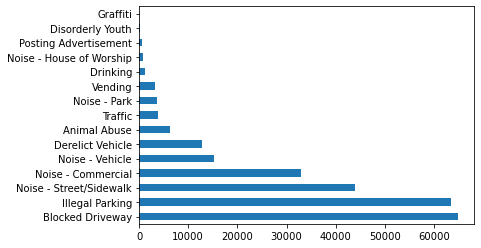

In [59]:
# Types of complaint
resolution_on_time['Complaint Type'].value_counts().plot(kind='barh')

<AxesSubplot:>

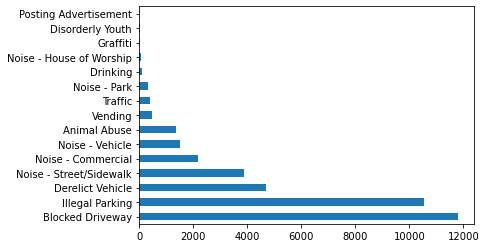

In [60]:
# Types of complaint
resolution_over_due['Complaint Type'].value_counts().plot(kind='barh')

#### Whether being resolved on time or being dued, most frequent complaint types are associated to blocked driveway and illegal parking. However rest of complaint types show slightly different frequencies for both time frames, i.e, on-time and over-dued.

In [61]:
# Description of complaint type registered
resolution_on_time['Descriptor'].value_counts()

Loud Music/Party                  55943
No Access                         48110
Loud Talking                      19693
Posted Parking Sign Violation     18705
Partial Access                    16770
Blocked Hydrant                   13784
With License Plate                12785
Commercial Overnight Parking      10237
Car/Truck Music                   10068
Blocked Sidewalk                   9242
Double Parked Blocking Traffic     4922
Banging/Pounding                   3817
Engine Idling                      3788
Double Parked Blocking Vehicle     3591
Car/Truck Horn                     3205
Neglected                          3058
Congestion/Gridlock                2337
In Prohibited Area                 1801
Other (complaint details)          1625
Unlicensed                         1496
Overnight Commercial Storage       1439
Unauthorized Bus Layover           1204
Truck Route Violation               867
In Public                           849
Tortured                            705


In [62]:
# Description complaint type registered
resolution_over_due['Descriptor'].value_counts()

No Access                         8614
With License Plate                4711
Loud Music/Party                  4492
Posted Parking Sign Violation     3398
Partial Access                    3181
Blocked Hydrant                   2053
Blocked Sidewalk                  1687
Commercial Overnight Parking      1671
Loud Talking                      1561
Car/Truck Music                   1046
Neglected                          713
Double Parked Blocking Traffic     636
Double Parked Blocking Vehicle     556
Engine Idling                      346
Other (complaint details)          336
Overnight Commercial Storage       307
Banging/Pounding                   273
Car/Truck Horn                     272
Unlicensed                         260
Congestion/Gridlock                217
In Prohibited Area                 216
Tortured                           144
Unauthorized Bus Layover           129
Truck Route Violation              115
Chained                             97
Detached Trailer         

#### For requests being resolved on time or being resolved lately, it is observed that much of the complaints are associated to no access type. Also, there are few requests that supposed to have a police report, even though they are very less in quantity.

<AxesSubplot:>

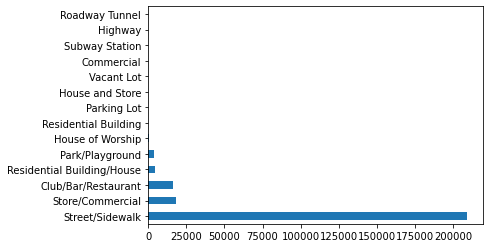

In [63]:
# Location types of complaint/request registered
resolution_on_time['Location Type'].value_counts().plot(kind='barh')

<AxesSubplot:>

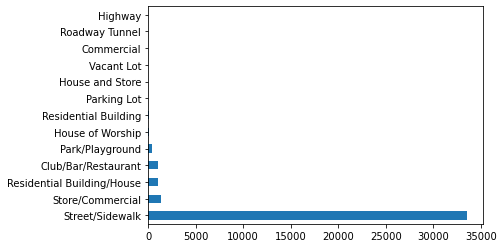

In [64]:
# Location types of complaint/request registered
resolution_over_due['Location Type'].value_counts().plot(kind='barh')

#### Irrespective of resolution time frame, street/sidewalk and store/commercial are the major location types being observed.

In [65]:
# City of complaint/request (Most frequent city locations)
resolution_on_time['City'].value_counts().head()

Brooklyn         85322
New York         58234
Bronx            31110
Staten Island    10790
Jamaica           6033
Name: City, dtype: int64

In [66]:
# City of complaint/request (Most frequent city locations)
resolution_over_due['City'].value_counts().head()

Brooklyn         11492
Bronx             9073
New York          3635
Staten Island     1396
Jamaica           1111
Name: City, dtype: int64

#### Top three cities in terms of complaints/requests registered and resolved consist of Brooklyn, Bronx and New York. 

In [67]:
# City of complaint/request (Least frequent city locations)
resolution_on_time['City'].value_counts().tail()

Floral Park      87
Central Park     80
New Hyde Park    71
Breezy Point     27
Queens           26
Name: City, dtype: int64

In [68]:
# City of complaint/request (Least frequent city locations)
resolution_over_due['City'].value_counts().tail()

Rockaway Park      15
Oakland Gardens    15
Central Park        8
Breezy Point        3
Queens              2
Name: City, dtype: int64

#### There are very few requests registered and resolved from Queens or Breezy Point city locations. However, overdued request resolution is very low in comparison to ontime resolution.

<AxesSubplot:ylabel='Borough'>

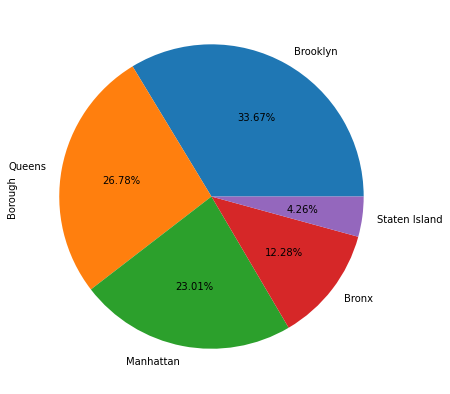

In [69]:
# Borough locations of request/complaint made
resolution_on_time['Borough'].value_counts().plot(kind='pie',autopct="%1.2f%%",figsize=(7,7))

<AxesSubplot:ylabel='Borough'>

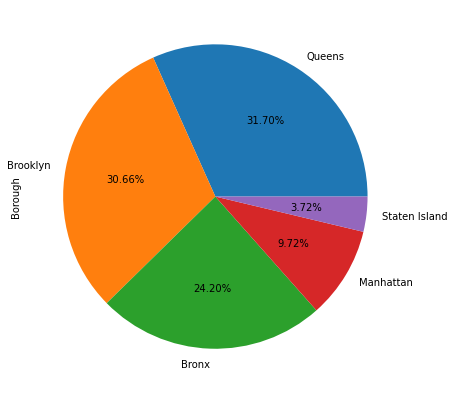

In [70]:
# Borough locations of request/complaint made
resolution_over_due['Borough'].value_counts().plot(kind='pie',autopct="%1.2f%%",figsize=(7,7))

#### Top two borough locations independent of resolution time frame consist of Queens and Brooklyn. Also, overdued resolutions percentages are more for Queens and Bronx borough in comparison to ontime resolution percentages. Manhattan borough shows good performance as percentage of resolutions being late are very less in comparison to ontime resolution.

In [71]:
# Description of resolution to request being made
resolution_on_time['Resolution Description'].value_counts(normalize=True)

The Police Department responded to the complaint and with the information available observed no evidence of the violation at that time.                                                      0.294574
The Police Department responded to the complaint and took action to fix the condition.                                                                                                       0.211626
The Police Department responded and upon arrival those responsible for the condition were gone.                                                                                              0.185970
The Police Department responded to the complaint and determined that police action was not necessary.                                                                                        0.132768
The Police Department issued a summons in response to the complaint.                                                                                                                         0.105422
The Police

In [72]:
# Description of resolution to request being made
resolution_over_due['Resolution Description'].value_counts(normalize=True)

The Police Department responded to the complaint and with the information available observed no evidence of the violation at that time.                                                      0.358294
The Police Department responded and upon arrival those responsible for the condition were gone.                                                                                              0.253188
The Police Department responded to the complaint and took action to fix the condition.                                                                                                       0.153577
The Police Department responded to the complaint and determined that police action was not necessary.                                                                                        0.099344
The Police Department reviewed your complaint and provided additional information below.                                                                                                     0.077762
The Police

#### Very less quantity are of those complaints where police have to make an arrest in response of complaint. However, most of the complaints are closed with resolution description indicating no evidence of any kind of violation in favour of complaint or request being made.  

In [73]:
np.unique(round((nyc311_data_1['Due Date']-nyc311_data_1['Created Date']).dt.seconds/3600))

array([8.])

### Each requests being generated are given time of approximately 8 hours to be addressed. Those requests that took maximum of 8 hours are considered to be resolved on time whereas those requests that took longer than 8 hours are to be considered overdued.

<AxesSubplot:>

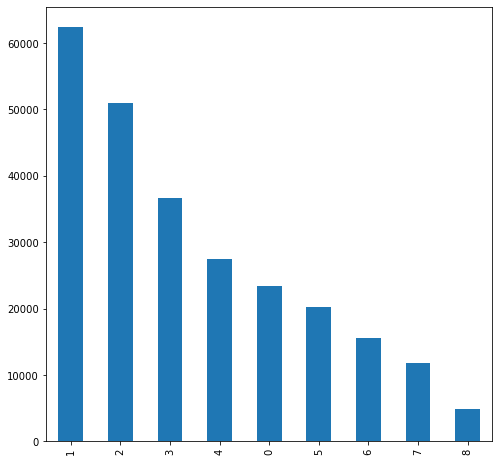

In [74]:
# Request resolution in terms of hours.
resolution_on_time['Request_Closing_Time_hours'].value_counts().plot(kind='bar',figsize=(8,8))

#### Most of the requests are resolved before due time and most of the resolution took approximately 1 to 3 hours and very few to have highers hours for resolving the request.

<AxesSubplot:>

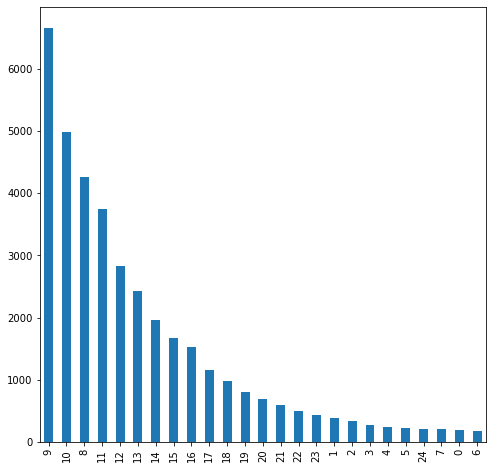

In [75]:
# Request resolution in terms of hours. Note-> 0 to 7 values here are due to fact that the resolution took 1 or more days to resolve.
resolution_over_due['Request_Closing_Time_hours'].value_counts().plot(kind='bar',figsize=(8,8))

<AxesSubplot:>

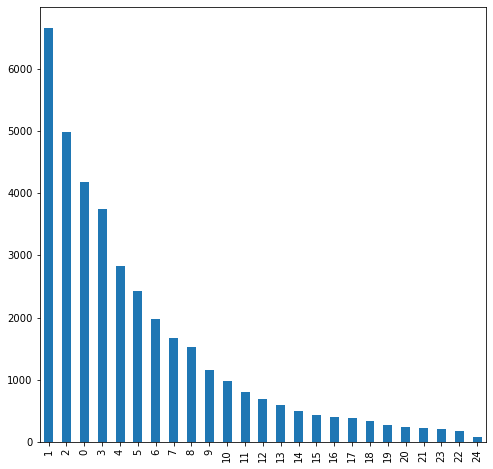

In [76]:
# overdued resolutions in terms additional hours (approximate) taken
resolution_over_due['Request_Closing_Due'].value_counts().plot(kind='bar',figsize=(8,8))

<AxesSubplot:>

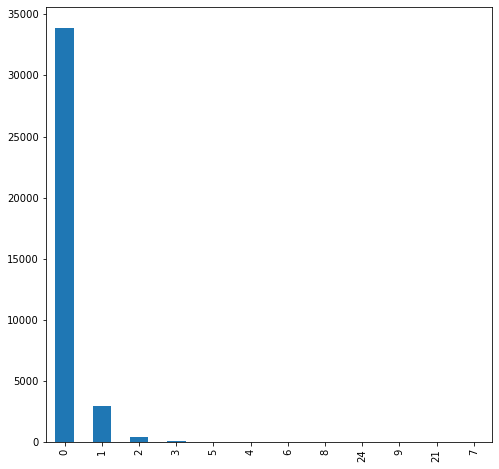

In [77]:
resolution_over_due['Request_Closing_Time_days'].value_counts().plot(kind='bar',figsize=(8,8))

#### Even if resolution is dued, it is found that most of resolutions for such cases are done on same day, however, at different additional hours after due time. Also, if taking into considerations the days, resolution took extra time of 1 to 3 days for majority of resolutions. There are negligle quantity of resolutions that took 21 and 27 days which are to be considered as outliers here as maximum days for dued resolution except for 21 and 24 days value, is 9 days.

<AxesSubplot:xlabel='Resolution in terms of days and hours'>

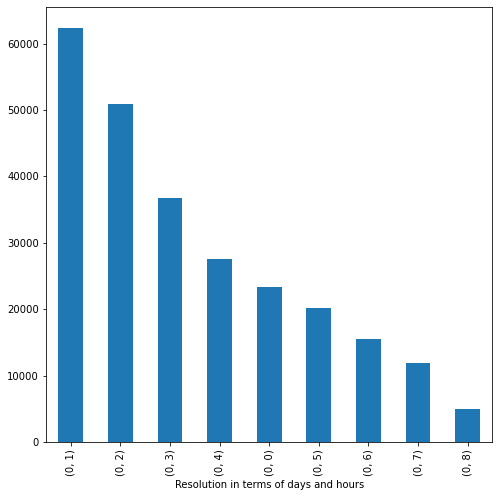

In [78]:
resolution_on_time[['Request_Closing_Time_days','Request_Closing_Time_hours']].value_counts().plot(kind='bar',figsize=(8,8),xlabel='Resolution in terms of days and hours')

<AxesSubplot:ylabel='Resolution in terms of days and hours'>

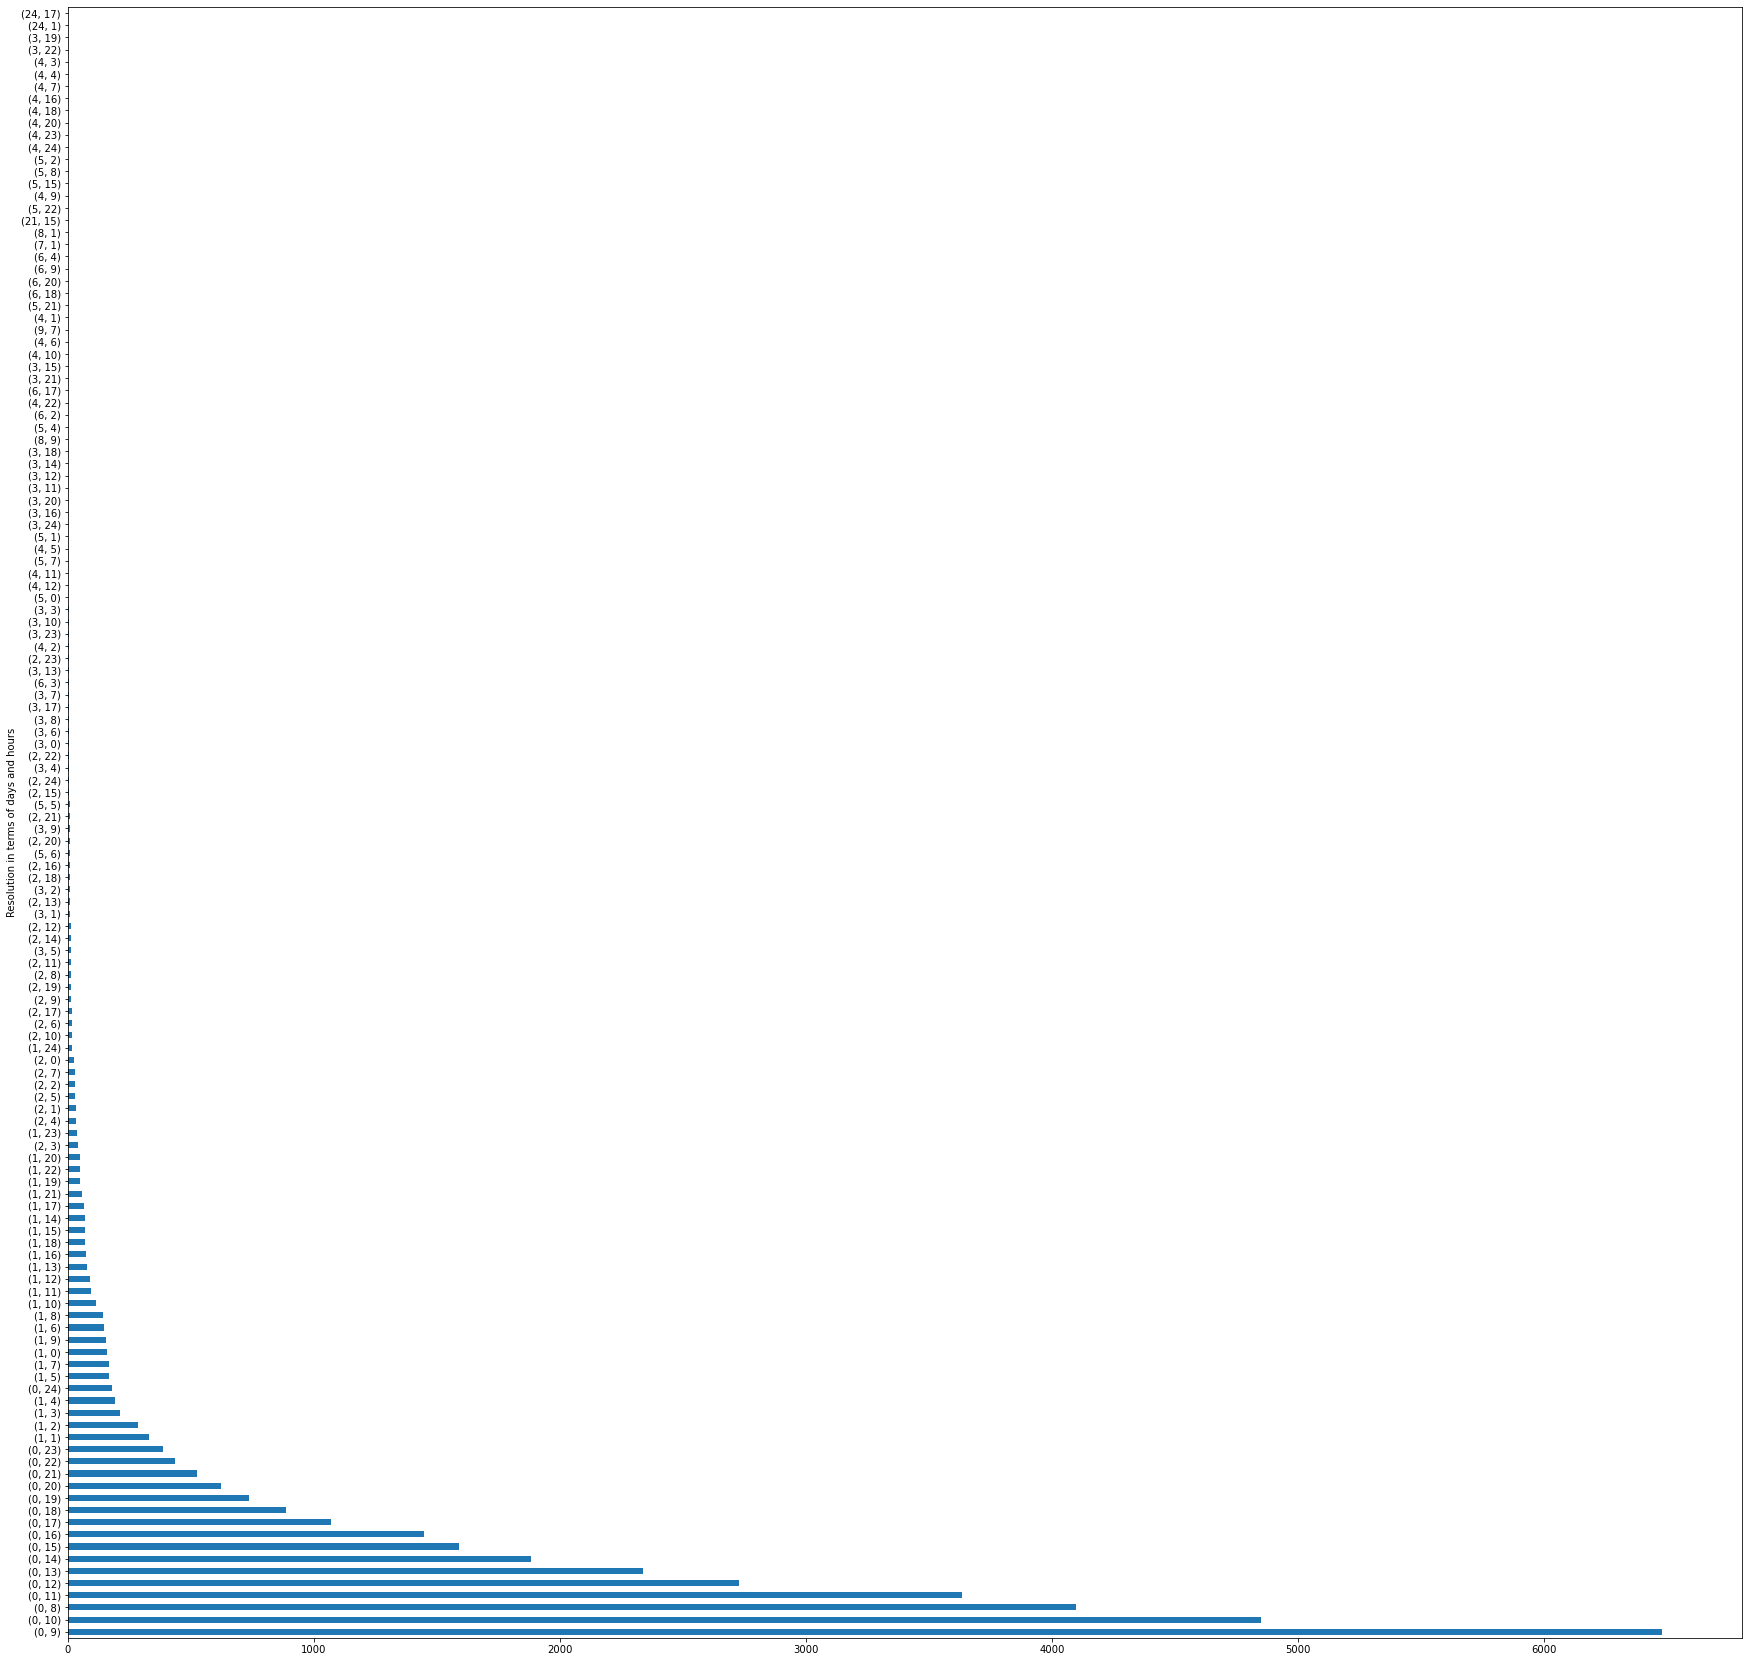

In [79]:
resolution_over_due[['Request_Closing_Time_days','Request_Closing_Time_hours']].value_counts().plot(kind='barh',figsize=(30,30),xlabel='Resolution in terms of days and hours')

<AxesSubplot:ylabel='Resolution in terms of days and additional hours'>

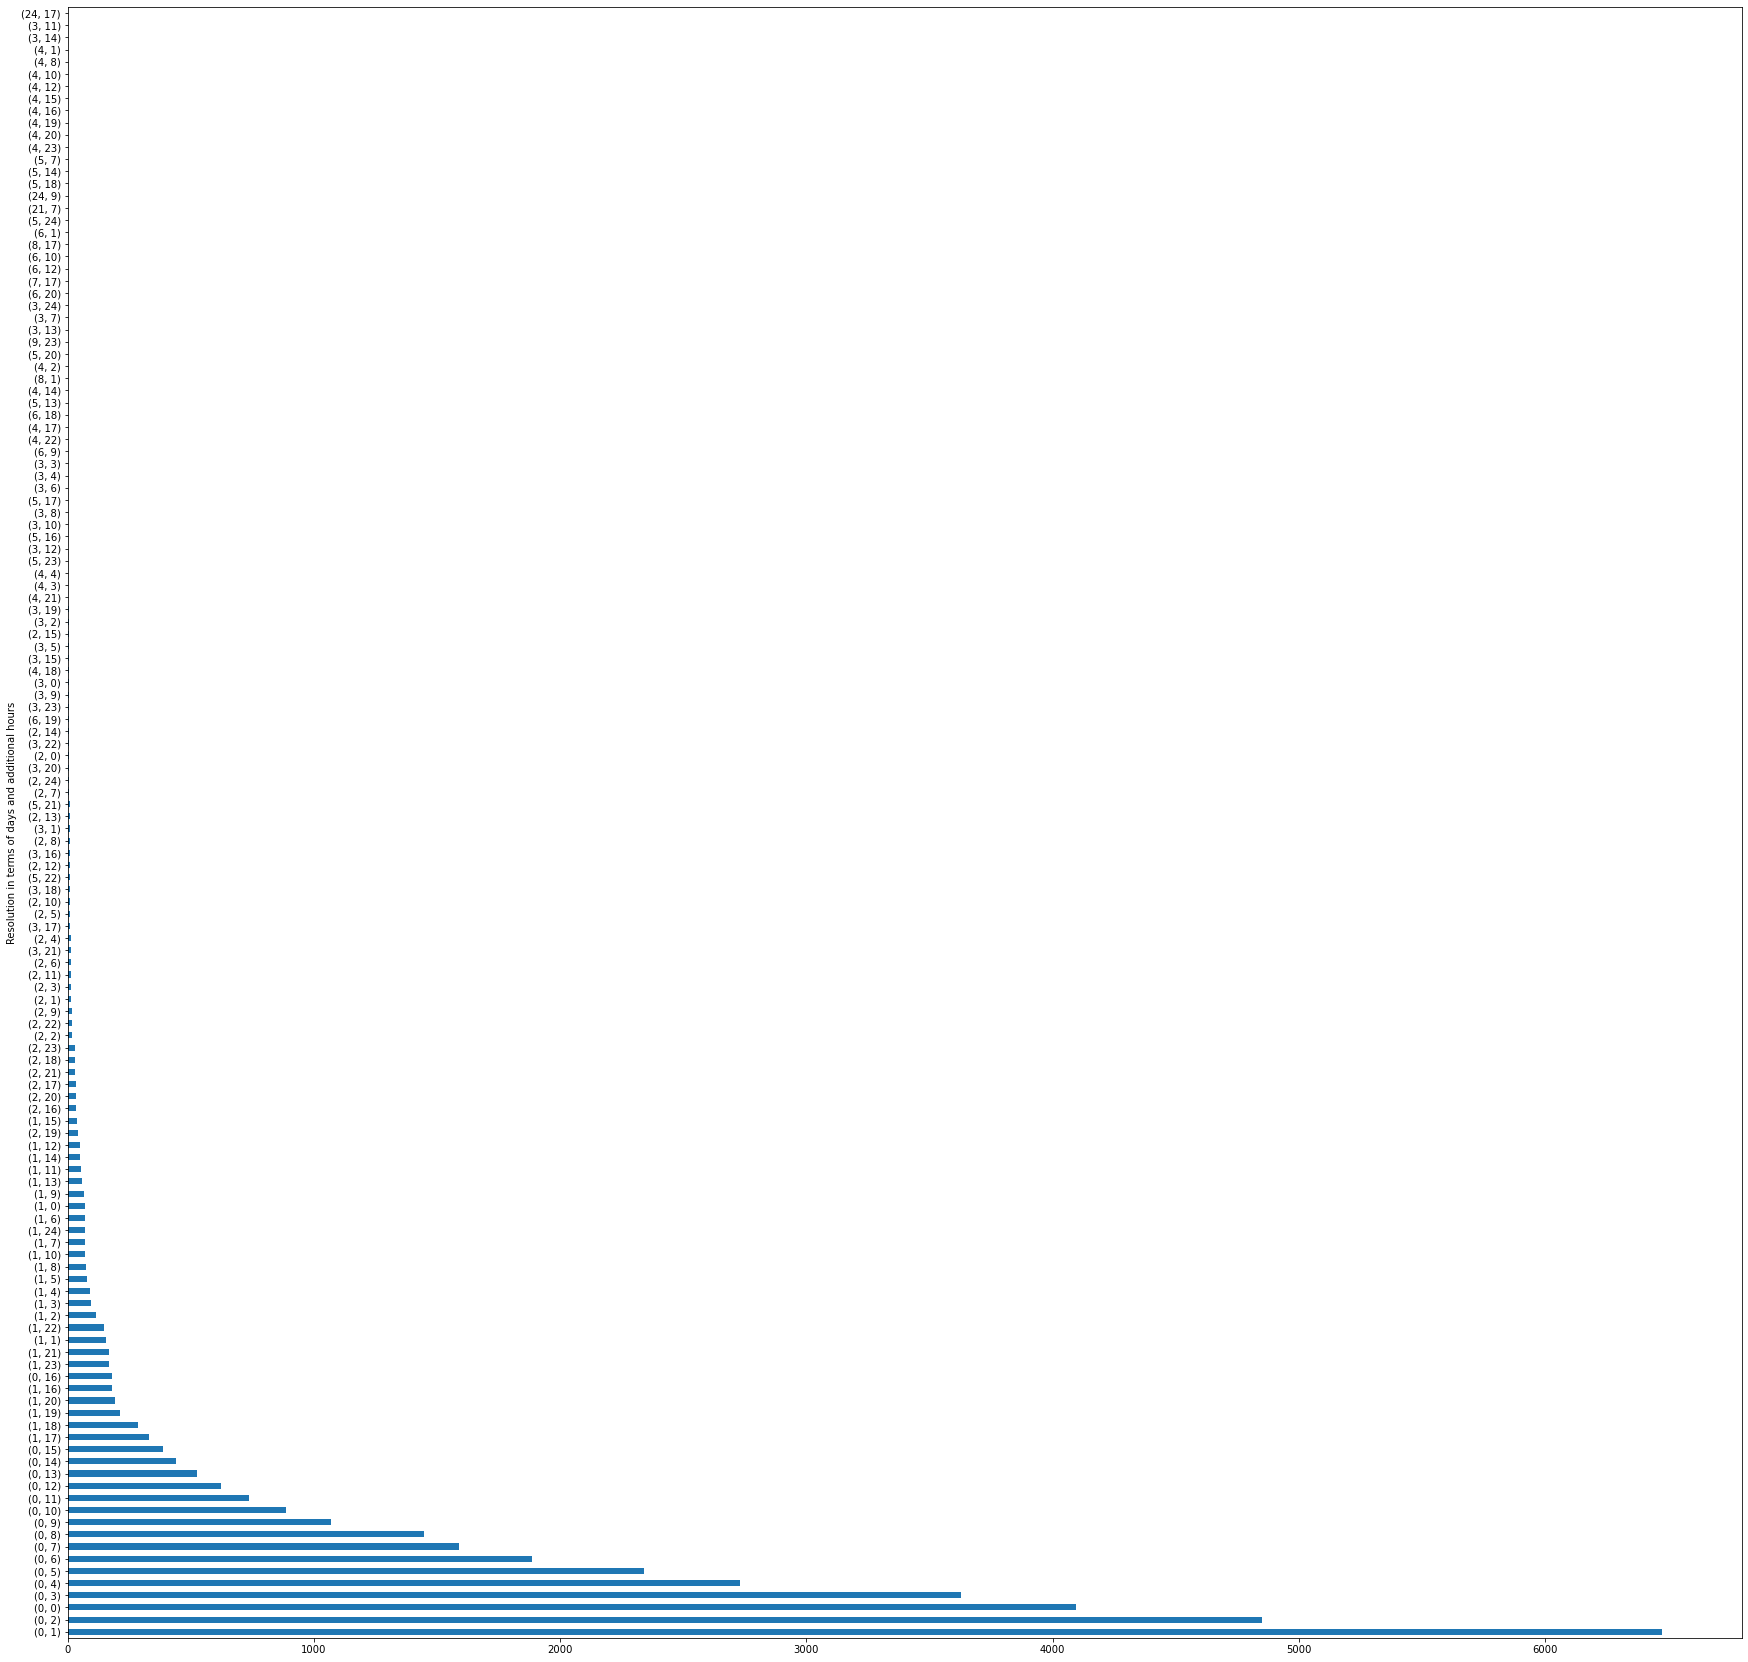

In [80]:
resolution_over_due[['Request_Closing_Time_days','Request_Closing_Due']].value_counts().plot(kind='barh',figsize=(30,30),xlabel='Resolution in terms of days and additional hours')

#### For dued resolutions, most of the resolutions are done on same day with extra time taken to be between 0 to 15 hours. As the value of day increases, there is observed lesser quantity of resolutions which indicates that most of the resolutions are done on time and even if somehow it is late, then it took mostly 1 to 3 days along with extra hours to resolve them.

### Further investigating ontime vs dued resolutions. 

In [81]:
# Complaint Type vs Descriptor
pd.crosstab(resolution_on_time['Complaint Type'],resolution_on_time['Descriptor']).style.background_gradient(cmap="cool",axis=None)

In [82]:
# Complaint Type vs Descriptor
pd.crosstab(resolution_over_due['Complaint Type'],resolution_over_due['Descriptor']).style.background_gradient(cmap="cool",axis=None)

In [83]:
# Complaint Type Vs Location Type
pd.crosstab(resolution_on_time['Complaint Type'],resolution_on_time['Location Type']).style.background_gradient(cmap="cool",axis=None)

In [84]:
# Complaint Type Vs Location Type
pd.crosstab(resolution_over_due['Complaint Type'],resolution_over_due['Location Type']).style.background_gradient(cmap="cool",axis=None)

In [85]:
# Complaint Type vs Borough
pd.crosstab(resolution_on_time['Complaint Type'],resolution_on_time['Borough']).style.background_gradient(cmap="cool",axis=None)

In [86]:
# Complaint Type vs Borough
pd.crosstab(resolution_over_due['Complaint Type'],resolution_over_due['Borough']).style.background_gradient(cmap="cool",axis=None)

In [87]:
# Complaint Type vs City
pd.crosstab(resolution_on_time['Complaint Type'],resolution_on_time['City']).style.background_gradient(cmap="cool",axis=None)

In [88]:
# Complaint Type vs City
pd.crosstab(resolution_over_due['Complaint Type'],resolution_over_due['City']).style.background_gradient(cmap="cool",axis=None)

In [89]:
# Complaint Type vs Resolution Description
pd.crosstab(resolution_on_time['Complaint Type'],resolution_on_time['Resolution Description']).style.background_gradient(cmap="cool",axis=None)

In [90]:
# Complaint Type vs Resolution Description
pd.crosstab(resolution_over_due['Complaint Type'],resolution_over_due['Resolution Description']).style.background_gradient(cmap="cool",axis=None)

In [91]:
# Complaint Type Vs Request closure in terms of hours
pd.crosstab(resolution_on_time['Complaint Type'],resolution_on_time['Request_Closing_Time_hours']).style.background_gradient(cmap="cool",axis=None)

In [92]:
# Complaint Type Vs Request closure in terms of hours for dued resolutions
# Note-> values 0 to 7 are also showing because resolution took 0 or more days to resolve, so if it took 1 or more days then it shows these values
pd.crosstab(resolution_over_due['Complaint Type'],resolution_over_due['Request_Closing_Time_hours']).style.background_gradient(cmap="cool",axis=None)

In [93]:
# Request Closure days Vs hours for dued resolution Note-> 0 to 7 values are due to fact that resolution took 1 or more days to resolve
pd.crosstab(resolution_over_due['Request_Closing_Time_days'],resolution_over_due['Request_Closing_Time_hours']).style.background_gradient(cmap="cool",axis=None)

In [94]:
# Complaint Type Vs Request closure in terms of hours for dued resolutions
pd.crosstab(resolution_over_due['Complaint Type'],resolution_over_due['Request_Closing_Time_hours']).style.background_gradient(cmap="cool",axis=None)

In [95]:
# Complaint Type Vs Request closure in terms of additional hours for dued resolutions
pd.crosstab(resolution_over_due['Complaint Type'],resolution_over_due['Request_Closing_Due']).style.background_gradient(cmap="cool",axis=None)

In [96]:
# Complaint Type Vs request closure in terms of days
pd.crosstab(resolution_on_time['Complaint Type'],resolution_on_time['Request_Closing_Time_days']).style.background_gradient(cmap="cool",axis=None)

In [97]:
# Complaint Type Vs request closure in terms of days
pd.crosstab(resolution_over_due['Complaint Type'],resolution_over_due['Request_Closing_Time_days']).style.background_gradient(cmap="cool",axis=None)

In [98]:
# Complaint Descriptor vs City
pd.crosstab(resolution_on_time['Descriptor'],resolution_on_time['City']).style.background_gradient(cmap="cool",axis=None)

In [99]:
# Complaint Descriptor vs City
pd.crosstab(resolution_over_due['Descriptor'],resolution_over_due['City']).style.background_gradient(cmap="cool",axis=None)

In [100]:
# Complaint descriptor vs location type
pd.crosstab(resolution_on_time['Location Type'],resolution_on_time['Descriptor']).style.background_gradient(cmap="cool",axis=None)

In [101]:
# Complaint descriptor vs location type
pd.crosstab(resolution_over_due['Location Type'],resolution_over_due['Descriptor']).style.background_gradient(cmap="cool",axis=None)

In [102]:
# Complaint descriptor vs borough
pd.crosstab(resolution_on_time['Borough'],resolution_on_time['Descriptor']).style.background_gradient(cmap="cool",axis=None)

In [103]:
# Complaint descriptor vs borough
pd.crosstab(resolution_over_due['Borough'],resolution_over_due['Descriptor']).style.background_gradient(cmap="cool",axis=None)

In [104]:
# Complaint Descriptions Vs request closure in terms of hours
pd.crosstab(resolution_on_time['Descriptor'],resolution_on_time['Request_Closing_Time_hours']).style.background_gradient(cmap="cool",axis=None)

In [105]:
# Complaint Description Vs request closure in terms of hours(dued resolutions)
pd.crosstab(resolution_over_due['Descriptor'],resolution_over_due['Request_Closing_Time_hours']).style.background_gradient(cmap="cool",axis=None)

In [106]:
# Complaint Description Vs request closure in terms of additional hours(dued resolutions)
pd.crosstab(resolution_over_due['Descriptor'],resolution_over_due['Request_Closing_Due']).style.background_gradient(cmap="cool",axis=None)

In [107]:
# Complaint Description Vs request closure in terms of days
pd.crosstab(resolution_on_time['Descriptor'],resolution_on_time['Request_Closing_Time_days']).style.background_gradient(cmap="cool",axis=None)

In [108]:
# Complaint Description Vs request closure in terms of days(dued resolutions)
pd.crosstab(resolution_over_due['Descriptor'],resolution_over_due['Request_Closing_Time_days']).style.background_gradient(cmap="cool",axis=None)

In [109]:
# Borough Vs request closure in terms of hours
pd.crosstab(resolution_on_time['Borough'],resolution_on_time['Request_Closing_Time_hours']).style.background_gradient(cmap="cool",axis=None)

In [110]:
# Borough Vs request closure in terms of hours(dued resolution)
pd.crosstab(resolution_over_due['Borough'],resolution_over_due['Request_Closing_Time_hours']).style.background_gradient(cmap="cool",axis=None)

In [111]:
# Borough Vs request closure in terms of additional hours(dued resolution)
pd.crosstab(resolution_over_due['Borough'],resolution_over_due['Request_Closing_Due']).style.background_gradient(cmap="cool",axis=None)

In [112]:
# Borough Vs request closure in terms of days
pd.crosstab(resolution_on_time['Borough'],resolution_on_time['Request_Closing_Time_days']).style.background_gradient(cmap="cool",axis=None)

In [113]:
# Borough Vs request closure in terms of days(dued resolution)
pd.crosstab(resolution_over_due['Borough'],resolution_over_due['Request_Closing_Time_days']).style.background_gradient(cmap="cool",axis=None)

In [114]:
resolution_on_time[resolution_on_time['Incident Address']!="Not_given"][['Complaint Type','Location Type','Borough','City']].value_counts().head(20)

Complaint Type           Location Type        Borough        City         
Blocked Driveway         Street/Sidewalk      Brooklyn       Brooklyn         23707
Illegal Parking          Street/Sidewalk      Brooklyn       Brooklyn         20580
Noise - Street/Sidewalk  Street/Sidewalk      Manhattan      New York         15879
                                              Brooklyn       Brooklyn         10237
Blocked Driveway         Street/Sidewalk      Bronx          Bronx             9657
Illegal Parking          Street/Sidewalk      Manhattan      New York          8811
Noise - Commercial       Store/Commercial     Manhattan      New York          6582
                         Club/Bar/Restaurant  Manhattan      New York          6293
Noise - Street/Sidewalk  Street/Sidewalk      Bronx          Bronx             6274
Noise - Commercial       Store/Commercial     Brooklyn       Brooklyn          5893
Illegal Parking          Street/Sidewalk      Bronx          Bronx             4749
N

In [115]:
resolution_over_due[resolution_over_due['Incident Address']!="Not_given"][['Complaint Type','Location Type','Borough','City']].value_counts().head(20)

Complaint Type           Location Type               Borough        City         
Blocked Driveway         Street/Sidewalk             Brooklyn       Brooklyn         4018
Illegal Parking          Street/Sidewalk             Brooklyn       Brooklyn         3155
Blocked Driveway         Street/Sidewalk             Bronx          Bronx            2901
Illegal Parking          Street/Sidewalk             Bronx          Bronx            1681
Noise - Street/Sidewalk  Street/Sidewalk             Bronx          Bronx            1291
Derelict Vehicle         Street/Sidewalk             Brooklyn       Brooklyn          954
Noise - Street/Sidewalk  Street/Sidewalk             Brooklyn       Brooklyn          836
Illegal Parking          Street/Sidewalk             Manhattan      New York          769
Noise - Street/Sidewalk  Street/Sidewalk             Manhattan      New York          757
Derelict Vehicle         Street/Sidewalk             Bronx          Bronx             656
Blocked Driveway  

In [116]:
resolution_on_time[resolution_on_time['Incident Address']!="Not_given"][['Complaint Type','Location Type','Borough','City','Request_Closing_Time_hours']].value_counts().head(20)

Complaint Type           Location Type        Borough    City      Request_Closing_Time_hours
Blocked Driveway         Street/Sidewalk      Brooklyn   Brooklyn  1                             5869
                                                                   2                             5028
Noise - Street/Sidewalk  Street/Sidewalk      Manhattan  New York  1                             4871
Illegal Parking          Street/Sidewalk      Brooklyn   Brooklyn  1                             4860
                                                                   2                             4210
Blocked Driveway         Street/Sidewalk      Brooklyn   Brooklyn  3                             3588
Noise - Street/Sidewalk  Street/Sidewalk      Manhattan  New York  2                             3327
Illegal Parking          Street/Sidewalk      Brooklyn   Brooklyn  3                             2999
Noise - Street/Sidewalk  Street/Sidewalk      Brooklyn   Brooklyn  1                      

In [117]:
resolution_over_due[resolution_over_due['Incident Address']!="Not_given"][['Complaint Type','Location Type','Borough','City','Request_Closing_Time_hours']].value_counts().head(20)

Complaint Type           Location Type    Borough   City      Request_Closing_Time_hours
Blocked Driveway         Street/Sidewalk  Brooklyn  Brooklyn  9                             765
Illegal Parking          Street/Sidewalk  Brooklyn  Brooklyn  9                             585
Blocked Driveway         Street/Sidewalk  Brooklyn  Brooklyn  10                            524
Illegal Parking          Street/Sidewalk  Brooklyn  Brooklyn  10                            489
Blocked Driveway         Street/Sidewalk  Brooklyn  Brooklyn  8                             458
                                                              11                            430
                                          Bronx     Bronx     9                             430
                                                              10                            369
Illegal Parking          Street/Sidewalk  Brooklyn  Brooklyn  11                            358
                                               

In [118]:
resolution_over_due[resolution_over_due['Incident Address']!="Not_given"][['Complaint Type','Location Type','Borough','City','Request_Closing_Due']].value_counts().head(20)

Complaint Type           Location Type    Borough   City      Request_Closing_Due
Blocked Driveway         Street/Sidewalk  Brooklyn  Brooklyn  1                      765
Illegal Parking          Street/Sidewalk  Brooklyn  Brooklyn  1                      584
Blocked Driveway         Street/Sidewalk  Brooklyn  Brooklyn  2                      524
Illegal Parking          Street/Sidewalk  Brooklyn  Brooklyn  2                      490
Blocked Driveway         Street/Sidewalk  Brooklyn  Brooklyn  0                      450
                                          Bronx     Bronx     1                      430
                                          Brooklyn  Brooklyn  3                      430
                                          Bronx     Bronx     2                      369
Illegal Parking          Street/Sidewalk  Brooklyn  Brooklyn  3                      358
                                                              0                      329
Blocked Driveway         Str

In [119]:
resolution_on_time[resolution_on_time['Incident Address']!="Not_given"][['Complaint Type','Location Type','City','Incident Address']].value_counts().head(20)

Complaint Type            Location Type        City           Incident Address       
Noise - Commercial        Store/Commercial     Bronx          1207 Beach Avenue          513
Illegal Parking           Street/Sidewalk      Fresh Meadows  78-15 Parsons Boulevard    484
Noise - Commercial        Store/Commercial     Brooklyn       89 Moore Street            404
Noise - Street/Sidewalk   Street/Sidewalk      Bronx          1207 Beach Avenue          320
Noise - Commercial        Store/Commercial     New York       2117 3 Avenue              295
                                               Brooklyn       608 Degraw Street          256
                                                              1175 Bedford Avenue        254
Posting Advertisement     Street/Sidewalk      Staten Island  177 Laredo Avenue          247
Noise - Commercial        Club/Bar/Restaurant  New York       248 West 132 Street        227
                                               Astoria        32-72 Steinway 

In [120]:
resolution_over_due[resolution_over_due['Incident Address']!="Not_given"][['Complaint Type','Location Type','City','Incident Address']].value_counts().head(20)

Complaint Type            Location Type        City             Incident Address            
Noise - Commercial        Store/Commercial     Brooklyn         89 Moore Street                 58
Noise - Street/Sidewalk   Street/Sidewalk      Bronx            1374 College Avenue             54
Illegal Parking           Street/Sidewalk      Brooklyn         1965 East 2 Street              36
Noise - Street/Sidewalk   Street/Sidewalk      Bronx            1466 Townsend Avenue            35
Noise - Commercial        Club/Bar/Restaurant  Howard Beach     164-49 Crossbay Boulevard       30
Blocked Driveway          Street/Sidewalk      Bronx            130 West 176 Street             25
Noise - House of Worship  House of Worship     Hollis           196-12 Jamaica Avenue           24
Illegal Parking           Street/Sidewalk      Bronx            10 Pennyfield Avenue            22
Noise - Street/Sidewalk   Street/Sidewalk      Bronx            1465 Townsend Avenue            21
                

In [121]:
resolution_on_time[resolution_on_time['Incident Address']!="Not_given"][['Complaint Type','Location Type','City','Incident Address','Request_Closing_Time_hours']].value_counts().head(20)

Complaint Type           Location Type        City           Incident Address         Request_Closing_Time_hours
Noise - Commercial       Store/Commercial     Bronx          1207 Beach Avenue        0                             162
                                                                                      1                             158
Illegal Parking          Street/Sidewalk      Fresh Meadows  78-15 Parsons Boulevard  1                             137
                                                                                      0                             116
                                                                                      2                             106
Noise - Street/Sidewalk  Street/Sidewalk      Bronx          1207 Beach Avenue        0                             103
Posting Advertisement    Street/Sidewalk      Staten Island  177 Laredo Avenue        1                              96
Noise - Commercial       Store/Commercial     B

In [122]:
resolution_over_due[resolution_over_due['Incident Address']!="Not_given"][['Complaint Type','Location Type','City','Incident Address','Request_Closing_Due']].value_counts().head(20)

Complaint Type           Location Type        City           Incident Address           Request_Closing_Due
Noise - Commercial       Store/Commercial     Brooklyn       89 Moore Street            2                      21
                                                                                        1                      13
Noise - Street/Sidewalk  Street/Sidewalk      Brooklyn       1815 East 17 Street        1                       9
                                              Bronx          1374 College Avenue        1                       9
Noise - Commercial       Store/Commercial     Brooklyn       89 Moore Street            3                       9
Blocked Driveway         Street/Sidewalk      Bronx          130 West 176 Street        9                       8
Noise - Street/Sidewalk  Street/Sidewalk      Bronx          975 Walton Avenue          1                       7
Illegal Parking          Street/Sidewalk      Fresh Meadows  78-15 Parsons Boulevard    5     

In [123]:
resolution_on_time[resolution_on_time['Incident Address']!="Not_given"][['Complaint Type','City','Street Name','Cross Street 1','Cross Street 2']].value_counts().head(20)

Complaint Type           City           Street Name        Cross Street 1      Cross Street 2    
Noise - Commercial       Brooklyn       Degraw Street      3 Avenue            4 Avenue              531
                         Bronx          Beach Avenue       Gleason Avenue      Westchester Avenue    517
                         Brooklyn       Moore Street       Graham Avenue       Humboldt Street       500
Illegal Parking          Fresh Meadows  Parsons Boulevard  78 Avenue           78 Road               484
Noise - Street/Sidewalk  Bronx          Beach Avenue       Gleason Avenue      Westchester Avenue    387
Posting Advertisement    Staten Island  Laredo Avenue      Pompey Avenue       Annadale Road         330
Noise - Commercial       Brooklyn       Bedford Avenue     Putnam Avenue       Jefferson Avenue      315
Noise - Street/Sidewalk  Brooklyn       Sterling Street    Nostrand Avenue     New York Avenue       307
Noise - Commercial       New York       3 Avenue           Eas

In [124]:
resolution_over_due[resolution_over_due['Incident Address']!="Not_given"][['Complaint Type','City','Street Name','Cross Street 1','Cross Street 2']].value_counts().head(20)

Complaint Type            City          Street Name         Cross Street 1   Cross Street 2     
Noise - Commercial        Brooklyn      Moore Street        Graham Avenue    Humboldt Street        71
Noise - Street/Sidewalk   Bronx         College Avenue      East 169 Street  East 170 Street        63
                                        Townsend Avenue     East 171 Street  East 172 Street        61
Illegal Parking           Brooklyn      East 2 Street       Avenue S         Avenue T               38
Noise - Street/Sidewalk   New York      Ellwood Street      West 196 Street  Broadway               38
Noise - Vehicle           Bronx         Sherman Avenue      East 167 Street  East 168 Street        32
Noise - Street/Sidewalk   Bronx         Sherman Avenue      East 167 Street  East 168 Street        31
Noise - Commercial        Howard Beach  Crossbay Boulevard  164 Avenue       165 Avenue             31
Blocked Driveway          Bronx         College Avenue      East 169 Street  Ea

In [125]:
resolution_on_time[resolution_on_time['Incident Address']!="Not_given"][['Complaint Type','City','Street Name','Cross Street 1','Cross Street 2','Request_Closing_Time_hours']].value_counts().head(20)

Complaint Type           City           Street Name        Cross Street 1    Cross Street 2      Request_Closing_Time_hours
Noise - Commercial       Brooklyn       Degraw Street      3 Avenue          4 Avenue            1                             210
                         Bronx          Beach Avenue       Gleason Avenue    Westchester Avenue  0                             163
                                                                                                 1                             160
Illegal Parking          Fresh Meadows  Parsons Boulevard  78 Avenue         78 Road             1                             137
Noise - Commercial       Brooklyn       Degraw Street      3 Avenue          4 Avenue            0                             135
Posting Advertisement    Staten Island  Laredo Avenue      Pompey Avenue     Annadale Road       1                             130
Illegal Parking          Fresh Meadows  Parsons Boulevard  78 Avenue         78 Road      

In [126]:
resolution_over_due[resolution_over_due['Incident Address']!="Not_given"][['Complaint Type','City','Street Name','Cross Street 1','Cross Street 2','Request_Closing_Time_hours']].value_counts().head(20)

Complaint Type           City           Street Name        Cross Street 1    Cross Street 2     Request_Closing_Time_hours
Noise - Commercial       Brooklyn       Moore Street       Graham Avenue     Humboldt Street    10                            22
                                                                                                9                             17
Noise - Vehicle          Bronx          Sherman Avenue     East 167 Street   East 168 Street    16                            12
Noise - Commercial       Brooklyn       Moore Street       Graham Avenue     Humboldt Street    11                            11
Noise - Street/Sidewalk  Bronx          Townsend Avenue    East 171 Street   East 172 Street    15                            10
                                        College Avenue     East 169 Street   East 170 Street    9                             10
                                        Townsend Avenue    East 171 Street   East 172 Street    11     

In [127]:
resolution_over_due[resolution_over_due['Incident Address']!="Not_given"][['Complaint Type','City','Street Name','Cross Street 1','Cross Street 2','Request_Closing_Due']].value_counts().head(20)

Complaint Type           City      Street Name        Cross Street 1    Cross Street 2     Request_Closing_Due
Noise - Commercial       Brooklyn  Moore Street       Graham Avenue     Humboldt Street    2                      22
                                                                                           1                      17
Noise - Vehicle          Bronx     Sherman Avenue     East 167 Street   East 168 Street    8                      12
Noise - Commercial       Brooklyn  Moore Street       Graham Avenue     Humboldt Street    3                      11
Noise - Street/Sidewalk  Bronx     Townsend Avenue    East 171 Street   East 172 Street    3                      10
                                                                                           7                      10
                                   College Avenue     East 169 Street   East 170 Street    1                      10
Noise - Commercial       Astoria   Steinway Street    25 Avenue       

In [128]:
resolution_on_time[resolution_on_time['Incident Address']!="Not_given"][['Complaint Type','City','Street Name','Cross Street 1','Cross Street 2','Request_Closing_Time_hours','Request_Closing_Time_days']].value_counts().head(20)

Complaint Type           City           Street Name        Cross Street 1    Cross Street 2      Request_Closing_Time_hours  Request_Closing_Time_days
Noise - Commercial       Brooklyn       Degraw Street      3 Avenue          4 Avenue            1                           0                            210
                         Bronx          Beach Avenue       Gleason Avenue    Westchester Avenue  0                           0                            163
                                                                                                 1                           0                            160
Illegal Parking          Fresh Meadows  Parsons Boulevard  78 Avenue         78 Road             1                           0                            137
Noise - Commercial       Brooklyn       Degraw Street      3 Avenue          4 Avenue            0                           0                            135
Posting Advertisement    Staten Island  Laredo Avenue      

In [129]:
resolution_over_due[resolution_over_due['Incident Address']!="Not_given"][['Complaint Type','City','Street Name','Cross Street 1','Cross Street 2','Request_Closing_Time_hours','Request_Closing_Time_days']].value_counts().head(20)

Complaint Type           City           Street Name        Cross Street 1    Cross Street 2     Request_Closing_Time_hours  Request_Closing_Time_days
Noise - Commercial       Brooklyn       Moore Street       Graham Avenue     Humboldt Street    10                          0                            22
                                                                                                9                           0                            17
Noise - Vehicle          Bronx          Sherman Avenue     East 167 Street   East 168 Street    16                          0                            12
Noise - Commercial       Brooklyn       Moore Street       Graham Avenue     Humboldt Street    11                          0                            11
Noise - Street/Sidewalk  Bronx          Townsend Avenue    East 171 Street   East 172 Street    15                          0                            10
Noise - Commercial       Astoria        Steinway Street    25 Avenue  

In [130]:
resolution_over_due[resolution_over_due['Incident Address']!="Not_given"][['Complaint Type','City','Street Name','Cross Street 1','Cross Street 2','Request_Closing_Due','Request_Closing_Time_days']].value_counts().head(20)

Complaint Type           City           Street Name        Cross Street 1    Cross Street 2     Request_Closing_Due  Request_Closing_Time_days
Noise - Commercial       Brooklyn       Moore Street       Graham Avenue     Humboldt Street    2                    0                            22
                                                                                                1                    0                            17
Noise - Vehicle          Bronx          Sherman Avenue     East 167 Street   East 168 Street    8                    0                            12
Noise - Commercial       Brooklyn       Moore Street       Graham Avenue     Humboldt Street    3                    0                            11
Noise - Street/Sidewalk  Bronx          Townsend Avenue    East 171 Street   East 172 Street    7                    0                            10
                                        College Avenue     East 169 Street   East 170 Street    1               

In [131]:
round(resolution_on_time.Request_Closing_Time_hours.mean())

3

In [132]:
round(resolution_over_due.Request_Closing_Due.mean())

5

#### For those requests that are supposed to be resolved on time shows that request resolution takes approximately 3 hours on average. Whereas those resolutions that are dued are supposed to take extra time of approximately 5 hours to resolve. 

## Grouping complaint types based on cities with respect to  average request closing time (ontime resolutions, hours are approximated to nearest values)

In [133]:
resolution_on_time.groupby(['City','Complaint Type','Request_Closing_Time']).mean()['Request_Closing_Time_hours'].round()

City      Complaint Type  Request_Closing_Time
Arverne   Animal Abuse    0 days 00:29:00         0.0
                          0 days 00:41:00         1.0
                          0 days 00:46:00         1.0
                          0 days 00:51:09         1.0
                          0 days 00:52:38         1.0
                                                 ... 
Woodside  Vending         0 days 05:20:36         5.0
                          0 days 05:27:00         5.0
                          0 days 06:00:23         6.0
                          0 days 06:53:00         7.0
                          0 days 07:57:40         8.0
Name: Request_Closing_Time_hours, Length: 166474, dtype: float64

In [134]:
resolution_on_time.sort_values(by=['City','Request_Closing_Time'],ascending=False,inplace=True)
resolution_on_time.head()

Created Date         Closed Date           Complaint Type  \
Unique Key                                                                    
31217539   2015-08-01 23:16:00 2015-08-02 07:16:00       Noise - Commercial   
30591381   2015-05-12 01:40:00 2015-05-12 09:40:00  Noise - Street/Sidewalk   
32042199   2015-11-21 23:38:19 2015-11-22 07:38:14          Illegal Parking   
31233674   2015-08-04 02:47:00 2015-08-04 10:46:00         Blocked Driveway   
30384820   2015-04-12 02:17:00 2015-04-12 10:16:00         Blocked Driveway   

                               Descriptor     Location Type  Incident Zip  \
Unique Key                                                                  
31217539                 Loud Music/Party  Store/Commercial         11377   
30591381                     Loud Talking   Street/Sidewalk         11377   
32042199    Posted Parking Sign Violation   Street/Sidewalk         11377   
31233674                        No Access   Street/Sidewalk         11377   
30384820                        No Access   Street/Sidewalk         11377   

                 Incident Address      Street Name Cross Street 1  \
Unique Key                                                          
31217539    67-03 Woodside Avenue  Woodside Avenue      67 Street   
30591381          67-14 41 Avenue        41 Avenue      67 Street   
32042199          30-99 54 Street        54 Street      51 Street   
31233674          50-40 47 Street        47 Street      50 Avenue   
30384820          48-40 46 Street        46 Street      48 Avenue   

                   Cross Street 2 Address Type      City            Due Date  \
Unique Key                                                                     
31217539                67 Street      Address  Woodside 2015-08-02 07:16:00   
30591381                68 Street      Address  Woodside 2015-05-12 09:40:00   
32042199                31 Avenue      Address  Woodside 2015-11-22 07:38:19   
31233674    Laurel Hill Boulevard      Address  Woodside 2015-08-04 10:47:00   
30384820                50 Avenue      Address  Woodside 2015-04-12 10:17:00   

                                       Resolution Description Community Board  \
Unique Key                                                                      
31217539    The Police Department responded to the complai...       02 Queens   
30591381    The Police Department responded to the complai...       02 Queens   
32042199    The Police Department responded to the complai...       01 Queens   
31233674    The Police Department responded to the complai...       02 Queens   
30384820    The Police Department responded to the complai...       02 Queens   

           Borough   Latitude  Longitude Request_Closing_Time  \
Unique Key                                                      
31217539    Queens  40.743101 -73.897413      0 days 08:00:00   
30591381    Queens  40.744504 -73.897559      0 days 08:00:00   
32042199    Queens  40.757097 -73.907379      0 days 07:59:55   
31233674    Queens  40.736487 -73.919092      0 days 07:59:00   
30384820    Queens  40.738988 -73.919543      0 days 07:59:00   

            Request_Closing_Time_hours  Request_Closing_Time_days  
Unique Key                                                         
31217539                             8                          0  
30591381                             8                          0  
32042199                             8                          0  
31233674                             8                          0  
30384820                             8                          0

## Statistical Test

### 1.Whether average response time across complaint types is similar or not 
### Let us assume we have alpha for this test as 0.05(5%)
### H0=Request_Closing_Time across Complaint Types is  similar
### H1=Request_Closing_Time across Complaint Types is not similar

### Kruskal-Wallis Hypothesis Test

In [135]:
complaint_type=resolution_on_time['Complaint Type'].unique()
len(complaint_type)

15

In [136]:
new=[]
for i in complaint_type:
    new.append(resolution_on_time.loc[resolution_on_time['Complaint Type']==i]['Request_Closing_Time_hours'].ravel())

In [137]:
new[11]

array([3, 1, 1, 0, 2, 0, 2, 1, 8, 7, 7, 7, 6, 6, 6, 6, 5, 5, 5, 5, 4, 4,
       3, 3, 3, 2, 0, 0, 4, 3, 3, 2, 6, 3, 1, 2, 2, 1, 1, 7, 1, 1, 1, 8,
       7, 7, 7, 6, 5, 5, 5, 5, 5, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 2, 2, 2,
       2, 2, 2, 1, 1, 1, 1, 6, 4, 3, 2, 2, 5, 5, 4, 7, 4, 2], dtype=int64)

In [138]:
from scipy.stats import kruskal,chi2_contingency


stat,p=kruskal(new[0],new[1],new[2],new[3],new[4],new[5],new[6],new[7],new[8],new[9],new[10],new[11],new[12],new[13],new[14])
print('Statistics - %.3f, p - %.3f'%(stat,p))
alpha=0.05
if p>alpha:
    print('Average request closing time is similar across complaint types for ontime resolutions')
else:
    print('Average request closing time is different across complaint types for ontime resolutions')

Statistics - 4988.636, p - 0.000
Average request closing time is different across complaint types for ontime resolutions


### From above it is observed that p-value is obtained as 0.000
### Since p-value is less than alpha(significance level), this implies that there is enough statistical evidence to reject the null hypothesis
### Therefore we can reject the null hypothesis that Request_Closing_Time across Complaint Types is similar for the requests that are reolved on time. So, request closing time across different complaint types are different.

## 2.Is there any relation between complaint types and locations ?

### H0 : There is no statistically significant relationship between city and complaint type
### H1 : There is a statistically significant relationship between city and complaint type
### alpha(significance level)=0.05(5%)

In [139]:
c_table=pd.crosstab(resolution_on_time['City'],resolution_on_time['Complaint Type'],margins=True)
c_table.head()

Complaint Type  Animal Abuse  Blocked Driveway  Derelict Vehicle  \
City                                                               
Arverne                   38                35                27   
Astoria                  105              2229               218   
Bayside                   34               369               180   
Bellerose                  4                63                42   
Breezy Point               2                 3                 2   

Complaint Type  Disorderly Youth  Drinking  Graffiti  Illegal Parking  \
City                                                                    
Arverne                        2         1         1               58   
Astoria                        3        31         2             1060   
Bayside                        1         1         3              499   
Bellerose                      2         1         0               70   
Breezy Point                   0         1         0               13   

Complaint Type  Noise - Commercial  Noise - House of Worship  Noise - Park  \
City                                                                         
Arverne                          2                        11             2   
Astoria                       1481                        19            56   
Bayside                         39                         2             3   
Bellerose                       29                         1             1   
Breezy Point                     4                         0             0   

Complaint Type  Noise - Street/Sidewalk  Noise - Vehicle  \
City                                                       
Arverne                              29                7   
Astoria                             458              186   
Bayside                              15               16   
Bellerose                             9               10   
Breezy Point                          1                1   

Complaint Type  Posting Advertisement  Traffic  Vending   All  
City                                                           
Arverne                             0        0        1   214  
Astoria                             1       34       44  5927  
Bayside                             0        7        2  1171  
Bellerose                           1        5        0   238  
Breezy Point                        0        0        0    27

In [140]:
c_table.shape

(49, 16)

In [141]:
c_table.iloc[0:5][0:17].values

array([[  38,   35,   27,    2,    1,    1,   58,    2,   11,    2,   29,
           7,    0,    0,    1,  214],
       [ 105, 2229,  218,    3,   31,    2, 1060, 1481,   19,   56,  458,
         186,    1,   34,   44, 5927],
       [  34,  369,  180,    1,    1,    3,  499,   39,    2,    3,   15,
          16,    0,    7,    2, 1171],
       [   4,   63,   42,    2,    1,    0,   70,   29,    1,    1,    9,
          10,    1,    5,    0,  238],
       [   2,    3,    2,    0,    1,    0,   13,    4,    0,    0,    1,
           1,    0,    0,    0,   27]], dtype=int64)

In [142]:
f_obs=[]
for i in range(0,c_table.shape[0]-1):
    f_obs.append(c_table.iloc[i][0:17].values)
f_obs=np.array(f_obs)
f_obs[0:5]

array([[  38,   35,   27,    2,    1,    1,   58,    2,   11,    2,   29,
           7,    0,    0,    1,  214],
       [ 105, 2229,  218,    3,   31,    2, 1060, 1481,   19,   56,  458,
         186,    1,   34,   44, 5927],
       [  34,  369,  180,    1,    1,    3,  499,   39,    2,    3,   15,
          16,    0,    7,    2, 1171],
       [   4,   63,   42,    2,    1,    0,   70,   29,    1,    1,    9,
          10,    1,    5,    0,  238],
       [   2,    3,    2,    0,    1,    0,   13,    4,    0,    0,    1,
           1,    0,    0,    0,   27]], dtype=int64)

In [143]:
chi2_contingency(f_obs)[0:3]

(92888.2348477179, 0.0, 705)

### Here first value returned is the test statistics(chi2)
### Second value returned is that of p-value
### Final value returned is degree of freedom value

### As p-value is less than alpha, we can definitely reject the null hypothesis. Hence, there is a statistically significant relationship between city and complaint type, i.e. , they are not independent of each other

## Grouping complaint types based on cities with respect to  average request closing time (dued resolutions, hours are approximated to nearest values)

In [144]:
resolution_over_due.groupby(['City','Complaint Type','Request_Closing_Time']).mean()['Request_Closing_Time_hours'].round()

City      Complaint Type  Request_Closing_Time
Astoria   Animal Abuse    0 days 08:01:26          8.0
                          0 days 08:09:32          8.0
                          0 days 08:27:44          8.0
                          0 days 08:47:24          9.0
                          0 days 09:06:46          9.0
                                                  ... 
Woodside  Traffic         0 days 14:33:52         15.0
                          0 days 15:07:08         15.0
                          0 days 20:49:37         21.0
          Vending         0 days 18:25:00         18.0
                          1 days 11:56:00         12.0
Name: Request_Closing_Time_hours, Length: 33660, dtype: float64

In [145]:
resolution_over_due.sort_values(by=['City','Request_Closing_Time'],ascending=False,inplace=True)
resolution_over_due

Created Date         Closed Date           Complaint Type  \
Unique Key                                                                    
31522305   2015-09-12 08:52:00 2015-09-14 17:05:20          Illegal Parking   
31744140   2015-10-13 20:43:00 2015-10-15 22:48:45         Derelict Vehicle   
31504462   2015-09-10 14:47:00 2015-09-12 15:33:00         Blocked Driveway   
31441786   2015-09-01 16:07:00 2015-09-03 16:04:00         Derelict Vehicle   
30589024   2015-05-10 15:08:00 2015-05-12 14:36:00         Derelict Vehicle   
...                        ...                 ...                      ...   
31210687   2015-07-31 19:28:44 2015-08-01 03:30:00         Blocked Driveway   
31511570   2015-09-11 15:11:00 2015-09-11 23:12:00          Illegal Parking   
30528072   2015-05-01 15:42:00 2015-05-01 23:43:00         Blocked Driveway   
31741512   2015-10-13 19:51:51 2015-10-14 03:52:29  Noise - Street/Sidewalk   
31105173   2015-07-18 23:02:50 2015-07-19 07:03:05       Noise - Commercial   

                               Descriptor        Location Type  Incident Zip  \
Unique Key                                                                     
31522305                 Blocked Sidewalk      Street/Sidewalk         11377   
31744140               With License Plate      Street/Sidewalk         11377   
31504462                        No Access      Street/Sidewalk         11377   
31441786               With License Plate      Street/Sidewalk         11377   
30589024               With License Plate      Street/Sidewalk         11377   
...                                   ...                  ...           ...   
31210687                        No Access      Street/Sidewalk         11105   
31511570    Posted Parking Sign Violation      Street/Sidewalk         11102   
30528072                        No Access      Street/Sidewalk         11103   
31741512                 Loud Music/Party      Street/Sidewalk         11105   
31105173                 Loud Music/Party  Club/Bar/Restaurant         11103   

                  Incident Address            Street Name  \
Unique Key                                                  
31522305    72-01 Queens Boulevard       Queens Boulevard   
31744140     Laurel Hill Boulevard  Laurel Hill Boulevard   
31504462           33-45 58 Street              58 Street   
31441786           46-11 66 Street              66 Street   
30589024           50-40 66 Street              66 Street   
...                            ...                    ...   
31210687           22-42 28 Street              28 Street   
31511570             11-48 30 Road                30 Road   
30528072           24-13 35 Street              35 Street   
31741512           22-70 38 Street              38 Street   
31105173     32-72 Steinway Street        Steinway Street   

                   Cross Street 1     Cross Street 2 Address Type      City  \
Unique Key                                                                    
31522305                72 Street          73 Street      Address  Woodside   
31744140                Not_given          Not_given      Latlong  Woodside   
31504462                     Bend          34 Avenue      Address  Woodside   
31441786    Laurel Hill Boulevard          48 Avenue      Address  Woodside   
30589024                50 Avenue          51 Avenue      Address  Woodside   
...                           ...                ...          ...       ...   
31210687        Ditmars Boulevard    Amtrak Railroad      Address   Astoria   
31511570         Vernon Boulevard          12 Street      Address   Astoria   
30528072                24 Avenue  Astoria Boulevard      Address   Astoria   
31741512        Ditmars Boulevard          23 Avenue      Address   Astoria   
31105173                 Broadway          34 Avenue      Address   Astoria   

                      Due Date  \
Unique Key                       
31522305   2015-09-12 16:52:00   
31744140   2015-10-14 04:

## Statistical Test

### 1.Whether average response time across complaint types is similar or not 
### Let us assume we have alpha for this test as 0.05(5%)
### H0=Request_Closing_Time across Complaint Types is  similar
### H1=Request_Closing_Time across Complaint Types is not similar

### Kruskal-Wallis Hypothesis Test

In [146]:
Complaint_Type=resolution_over_due['Complaint Type'].unique()
len(Complaint_Type)

15

In [147]:
new_1=[]
for i in Complaint_Type:
    new_1.append(resolution_over_due.loc[resolution_over_due['Complaint Type']==i]['Request_Closing_Time_hours'].ravel())

In [148]:
new_1[11]

array([15,  9,  9, 18,  5, 10, 10, 12, 15, 12,  7, 15,  3, 16, 16, 15, 14,
       13, 11, 11, 10,  9,  8, 22, 17, 13, 10,  1, 20], dtype=int64)

In [149]:
stat_1,p_1=kruskal(new_1[0],new_1[1],new_1[2],new_1[3],new_1[4],new_1[5],new_1[6],new_1[7],new_1[8],new_1[9],new_1[10],new_1[11],new_1[12],new_1[13],new_1[14])
print('Statistics - %.3f, p - %.3f'%(stat_1,p_1))
alpha=0.05
if p_1>alpha:
    print('Average request closing time is similar across complaint types for dued resolutions')
else:
    print('Average request closing time is not similar across complaint types for dued resolutions')

Statistics - 203.525, p - 0.000
Average request closing time is not similar across complaint types for dued resolutions


### From above it is observed that p-value is obtained as 0.000
### Since p-value is less than alpha(significance level), this implies that there is enough statistical evidence to reject the null hypothesis
### Therefore we can reject the null hypothesis that Request_Closing_Time across Complaint Types is similar.

## 2.Is there any relation between complaint types and locations ?

### H0 : There is no statistically significant relationship between city and complaint type
### H1 : There is a statistically significant relationship between city and complaint type
### alpha(significance level)=0.05(5%)

In [150]:
c_table_1=pd.crosstab(resolution_over_due['City'],resolution_over_due['Complaint Type'],margins=True)
c_table_1.head()

Complaint Type  Animal Abuse  Blocked Driveway  Derelict Vehicle  \
City                                                               
Astoria                   20               505               145   
Bayside                    3                 7                18   
Bellerose                  3                32                47   
Breezy Point               0                 0                 1   
Bronx                    439              2941               797   

Complaint Type  Disorderly Youth  Drinking  Graffiti  Illegal Parking  \
City                                                                    
Astoria                        0         4         2              218   
Bayside                        0         0         0               12   
Bellerose                      0         0         0               35   
Breezy Point                   0         0         0                2   
Bronx                          7        38         4             2090   

Complaint Type  Noise - Commercial  Noise - House of Worship  Noise - Park  \
City                                                                         
Astoria                         62                         0             5   
Bayside                          1                         0             0   
Bellerose                        8                         0             0   
Breezy Point                     0                         0             0   
Bronx                          358                        13            79   

Complaint Type  Noise - Street/Sidewalk  Noise - Vehicle  \
City                                                       
Astoria                              41               18   
Bayside                               0                0   
Bellerose                             4                0   
Breezy Point                          0                0   
Bronx                              1530              620   

Complaint Type  Posting Advertisement  Traffic  Vending   All  
City                                                           
Astoria                             0       11       10  1041  
Bayside                             0        0        0    41  
Bellerose                           0        2        0   131  
Breezy Point                        0        0        0     3  
Bronx                               3       52      102  9073

In [151]:
c_table_1.shape

(48, 16)

In [152]:
c_table_1.iloc[0:5][0:17].values

array([[  20,  505,  145,    0,    4,    2,  218,   62,    0,    5,   41,
          18,    0,   11,   10, 1041],
       [   3,    7,   18,    0,    0,    0,   12,    1,    0,    0,    0,
           0,    0,    0,    0,   41],
       [   3,   32,   47,    0,    0,    0,   35,    8,    0,    0,    4,
           0,    0,    2,    0,  131],
       [   0,    0,    1,    0,    0,    0,    2,    0,    0,    0,    0,
           0,    0,    0,    0,    3],
       [ 439, 2941,  797,    7,   38,    4, 2090,  358,   13,   79, 1530,
         620,    3,   52,  102, 9073]], dtype=int64)

In [153]:
f_obs_1=[]
for i in range(0,c_table_1.shape[0]-1):
    f_obs_1.append(c_table_1.iloc[i][0:17].values)
f_obs_1=np.array(f_obs_1)
f_obs_1[0:5]

array([[  20,  505,  145,    0,    4,    2,  218,   62,    0,    5,   41,
          18,    0,   11,   10, 1041],
       [   3,    7,   18,    0,    0,    0,   12,    1,    0,    0,    0,
           0,    0,    0,    0,   41],
       [   3,   32,   47,    0,    0,    0,   35,    8,    0,    0,    4,
           0,    0,    2,    0,  131],
       [   0,    0,    1,    0,    0,    0,    2,    0,    0,    0,    0,
           0,    0,    0,    0,    3],
       [ 439, 2941,  797,    7,   38,    4, 2090,  358,   13,   79, 1530,
         620,    3,   52,  102, 9073]], dtype=int64)

In [154]:
chi2_contingency(f_obs_1)[0:3]

(11626.672790852, 0.0, 690)

### Here first value returned is the test statistics(chi2)
### Second value returned is that of p-value
### Final value returned is degree of freedom value

### As p-value is less than alpha, we can definitely reject the null hypothesis. Hence, there is a statistically significant relationship between city and complaint type, i.e. , they are not independent of each other

## Service Request Analysis (irrespective of due date)  

In [155]:
nyc311_data_1.head(2)

Created Date         Closed Date           Complaint Type  \
Unique Key                                                                    
32310363   2015-12-31 23:59:45 2016-01-01 00:55:00  Noise - Street/Sidewalk   
32309934   2015-12-31 23:59:44 2016-01-01 01:26:00         Blocked Driveway   

                  Descriptor    Location Type  Incident Zip  \
Unique Key                                                    
32310363    Loud Music/Party  Street/Sidewalk         10034   
32309934           No Access  Street/Sidewalk         11105   

               Incident Address       Street Name  Cross Street 1  \
Unique Key                                                          
32310363    71 Vermilyea Avenue  Vermilyea Avenue  Academy Street   
32309934        27-07 23 Avenue         23 Avenue       27 Street   

             Cross Street 2 Address Type      City            Due Date  \
Unique Key                                                               
32310363    West 204 Street      Address  New York 2016-01-01 07:59:00   
32309934          28 Street      Address   Astoria 2016-01-01 07:59:00   

                                       Resolution Description Community Board  \
Unique Key                                                                      
32310363    The Police Department responded and upon arriv...    12 Manhattan   
32309934    The Police Department responded to the complai...       01 Queens   

              Borough   Latitude  Longitude Request_Closing_Time  \
Unique Key                                                         
32310363    Manhattan  40.865682 -73.923501      0 days 00:55:15   
32309934       Queens  40.775945 -73.915094      0 days 01:26:16   

            Request_Closing_Time_hours  Request_Closing_Time_days  
Unique Key                                                         
32310363                             1                          0  
32309934                             1                          0

<AxesSubplot:>

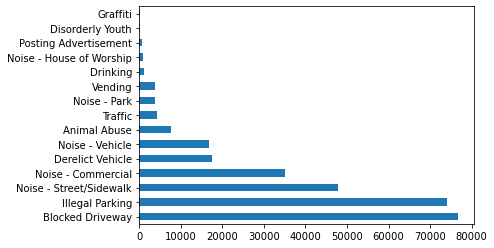

In [156]:
# Types of complaint
nyc311_data_1['Complaint Type'].value_counts().plot(kind='barh')

#### Major proportion of complaint type consist of blocked driveway or illegal parking and noise related, whether from vehicle, commercial(or factory noise) or from streets and sidewalks. On the other hands complaints in name of graffiti, advertisement posting or misbehave from youth are very few. 

In [157]:
# Description complaint type registered
nyc311_data_1['Descriptor'].value_counts()

Loud Music/Party                  60435
No Access                         56724
Posted Parking Sign Violation     22103
Loud Talking                      21254
Partial Access                    19951
With License Plate                17496
Blocked Hydrant                   15837
Commercial Overnight Parking      11908
Car/Truck Music                   11114
Blocked Sidewalk                  10929
Double Parked Blocking Traffic     5558
Double Parked Blocking Vehicle     4147
Engine Idling                      4134
Banging/Pounding                   4090
Neglected                          3771
Car/Truck Horn                     3477
Congestion/Gridlock                2554
In Prohibited Area                 2017
Other (complaint details)          1961
Unlicensed                         1756
Overnight Commercial Storage       1746
Unauthorized Bus Layover           1333
Truck Route Violation               982
In Public                           923
Tortured                            849


#### Hughe proportion of complaint type description belongs to  loud music/party or no access regions.

<AxesSubplot:>

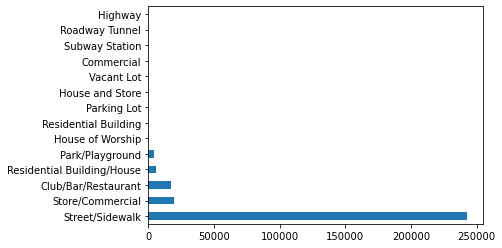

In [158]:
# Location types of complaint/request registered
nyc311_data_1['Location Type'].value_counts().plot(kind='barh')

#### There is total domination of Street/Sidewalk over other values which indicate much of the complaints or request being registered belongs to streets or sidewalk locations followed by store or commercial locations. 

In [159]:
# City of complaint/request (Most frequent city locations)
nyc311_data_1['City'].value_counts().head()

Brooklyn         96814
New York         61869
Bronx            40183
Staten Island    12186
Jamaica           7144
Name: City, dtype: int64

In [160]:
# City of complaint/request (Least frequent city locations)
nyc311_data_1['City'].value_counts().tail()

Floral Park      152
New Hyde Park     96
Central Park      88
Breezy Point      30
Queens            28
Name: City, dtype: int64

#### Much of the requests or complaints being generated are from Brooklyn, New York or Bronx location whereas less number of requests are made from locations of Queens, Breezy Point and New Hyde Park. 

<AxesSubplot:ylabel='Borough'>

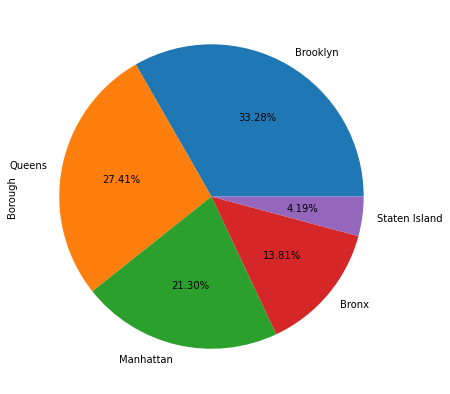

In [161]:
# Borough locations of request/complaint made
nyc311_data_1['Borough'].value_counts().plot(kind='pie',autopct="%1.2f%%",figsize=(7,7))

#### Many of requests are made from Brooklyn borough followed by Queens borough. However, Staten Island and Bronx borough constitute less to requests or complaints being registered. 

In [162]:
# Community boards of request/complaint registered
nyc311_data_1['Community Board'].value_counts().head()

12 Manhattan    12287
01 Brooklyn     10690
05 Queens        9355
01 Queens        9098
09 Queens        7928
Name: Community Board, dtype: int64

In [163]:
nyc311_data_1['Community Board'].value_counts().tail()

83 Queens      12
84 Queens      11
26 Bronx       10
80 Queens       7
56 Brooklyn     4
Name: Community Board, dtype: int64

#### From community board point of view, much of the registered requests are from 12 Manhattan, closely followed by 01 Brooklyn and 05 Queens. However, very few registrations are from 56 Brooklyn, 80 Queens and 26 Bronx. 

In [164]:
# Description of resolution to request being made
nyc311_data_1['Resolution Description'].value_counts(normalize=True)

The Police Department responded to the complaint and with the information available observed no evidence of the violation at that time.                                                      0.302785
The Police Department responded to the complaint and took action to fix the condition.                                                                                                       0.204145
The Police Department responded and upon arrival those responsible for the condition were gone.                                                                                              0.194633
The Police Department responded to the complaint and determined that police action was not necessary.                                                                                        0.128460
The Police Department issued a summons in response to the complaint.                                                                                                                         0.096880
The Police

#### Very less quantity are of those complaints where police have to make an arrest in response of complaint. However, most of the complaints are closed with resolution description indicating no evidence of any kind of violation in favour of complaint or request being made.  

In [165]:
# Request resolution in terms of hours.
nyc311_data_1['Request_Closing_Time_hours'].value_counts()

1     62741
2     51252
3     36948
4     27749
0     23566
5     20390
6     15770
7     12068
8      9191
9      6660
10     4987
11     3747
12     2835
13     2432
14     1970
15     1674
16     1535
17     1159
18      975
19      802
20      686
21      597
22      499
23      435
24      208
Name: Request_Closing_Time_hours, dtype: int64

#### Most of the request resolutions are made within 1 to 3 hours with very less resolutions taking 6 to 8 hours.( Note, hours value are rounded off to nearest approximations here.) 

In [167]:
# Complaint Type vs Descriptor
pd.crosstab(nyc311_data_1['Complaint Type'],nyc311_data_1['Descriptor']).style.background_gradient(cmap="cool",axis=None)

In [168]:
pd.crosstab(nyc311_data_1['Complaint Type'],nyc311_data_1['Location Type']).style.background_gradient(cmap="cool",axis=None)

In [169]:
# Complaint Type vs Borough
pd.crosstab(nyc311_data_1['Complaint Type'],nyc311_data_1['Borough']).style.background_gradient(cmap="cool",axis=None)

In [170]:
# Complaint Type vs Community Board
pd.crosstab(nyc311_data_1['Complaint Type'],nyc311_data_1['Community Board']).style.background_gradient(cmap="cool",axis=None)

In [171]:
# Complaint Type vs City
pd.crosstab(nyc311_data_1['Complaint Type'],nyc311_data_1['City']).style.background_gradient(cmap="cool",axis=None)

In [172]:
# Complaint Type vs Resolution Description
pd.crosstab(nyc311_data_1['Complaint Type'],nyc311_data_1['Resolution Description']).style.background_gradient(cmap="cool",axis=None)

In [173]:
pd.crosstab(nyc311_data_1['Complaint Type'],nyc311_data_1['Request_Closing_Time_hours']).style.background_gradient(cmap="cool",axis=None)

In [174]:
# Complaint Descriptor vs City
pd.crosstab(nyc311_data_1['Descriptor'],nyc311_data_1['City']).style.background_gradient(cmap="cool",axis=None)

In [175]:
# Complaint descriptor vs location type
pd.crosstab(nyc311_data_1['Location Type'],nyc311_data_1['Descriptor']).style.background_gradient(cmap="cool",axis=None)

In [176]:
# Complaint descriptor vs borough
pd.crosstab(nyc311_data_1['Borough'],nyc311_data_1['Descriptor']).style.background_gradient(cmap="cool",axis=None)

In [177]:
pd.crosstab(nyc311_data_1['Descriptor'],nyc311_data_1['Request_Closing_Time_hours']).style.background_gradient(cmap="cool",axis=None)

In [178]:
pd.crosstab(nyc311_data_1['Borough'],nyc311_data_1['Request_Closing_Time_hours']).style.background_gradient(cmap="cool",axis=None)

In [179]:
nyc311_data_1[nyc311_data_1['Incident Address']!="Not_given"][['Complaint Type','Location Type','Borough','City']].value_counts().head(20)

Complaint Type           Location Type        Borough        City         
Blocked Driveway         Street/Sidewalk      Brooklyn       Brooklyn         27725
Illegal Parking          Street/Sidewalk      Brooklyn       Brooklyn         23735
Noise - Street/Sidewalk  Street/Sidewalk      Manhattan      New York         16636
Blocked Driveway         Street/Sidewalk      Bronx          Bronx            12558
Noise - Street/Sidewalk  Street/Sidewalk      Brooklyn       Brooklyn         11073
Illegal Parking          Street/Sidewalk      Manhattan      New York          9580
Noise - Street/Sidewalk  Street/Sidewalk      Bronx          Bronx             7565
Noise - Commercial       Store/Commercial     Manhattan      New York          6902
                         Club/Bar/Restaurant  Manhattan      New York          6596
Illegal Parking          Street/Sidewalk      Bronx          Bronx             6430
Noise - Commercial       Store/Commercial     Brooklyn       Brooklyn          6298
D

In [180]:
nyc311_data_1[nyc311_data_1['Incident Address']!="Not_given"][['Complaint Type','Location Type','Borough','City','Request_Closing_Time_hours']].value_counts().head(20)

Complaint Type           Location Type        Borough    City      Request_Closing_Time_hours
Blocked Driveway         Street/Sidewalk      Brooklyn   Brooklyn  1                             5886
                                                                   2                             5053
Illegal Parking          Street/Sidewalk      Brooklyn   Brooklyn  1                             4895
Noise - Street/Sidewalk  Street/Sidewalk      Manhattan  New York  1                             4876
Illegal Parking          Street/Sidewalk      Brooklyn   Brooklyn  2                             4229
Blocked Driveway         Street/Sidewalk      Brooklyn   Brooklyn  3                             3605
Noise - Street/Sidewalk  Street/Sidewalk      Manhattan  New York  2                             3331
Illegal Parking          Street/Sidewalk      Brooklyn   Brooklyn  3                             3015
Noise - Street/Sidewalk  Street/Sidewalk      Brooklyn   Brooklyn  1                      

In [181]:
nyc311_data_1[nyc311_data_1['Incident Address']!="Not_given"][['Complaint Type','Location Type','Borough','City','Request_Closing_Time_hours','Request_Closing_Time_days']].value_counts().head(20)

Complaint Type           Location Type        Borough    City      Request_Closing_Time_hours  Request_Closing_Time_days
Blocked Driveway         Street/Sidewalk      Brooklyn   Brooklyn  1                           0                            5869
                                                                   2                           0                            5028
Noise - Street/Sidewalk  Street/Sidewalk      Manhattan  New York  1                           0                            4871
Illegal Parking          Street/Sidewalk      Brooklyn   Brooklyn  1                           0                            4860
                                                                   2                           0                            4210
Blocked Driveway         Street/Sidewalk      Brooklyn   Brooklyn  3                           0                            3588
Noise - Street/Sidewalk  Street/Sidewalk      Manhattan  New York  2                           0         

In [182]:
nyc311_data_1[nyc311_data_1['Incident Address']!="Not_given"][['Complaint Type','Location Type','City','Incident Address']].value_counts().head(20)

Complaint Type            Location Type        City           Incident Address       
Noise - Commercial        Store/Commercial     Bronx          1207 Beach Avenue          524
Illegal Parking           Street/Sidewalk      Fresh Meadows  78-15 Parsons Boulevard    503
Noise - Commercial        Store/Commercial     Brooklyn       89 Moore Street            462
Noise - Street/Sidewalk   Street/Sidewalk      Bronx          1207 Beach Avenue          337
Noise - Commercial        Store/Commercial     New York       2117 3 Avenue              295
                                               Brooklyn       608 Degraw Street          258
                                                              1175 Bedford Avenue        254
Posting Advertisement     Street/Sidewalk      Staten Island  177 Laredo Avenue          250
Noise - Commercial        Club/Bar/Restaurant  New York       248 West 132 Street        228
                                               Astoria        32-72 Steinway 

In [183]:
nyc311_data_1[nyc311_data_1['Incident Address']!="Not_given"][['Complaint Type','Location Type','City','Incident Address','Request_Closing_Time_hours']].value_counts().head(20)

Complaint Type           Location Type        City           Incident Address         Request_Closing_Time_hours
Noise - Commercial       Store/Commercial     Bronx          1207 Beach Avenue        0                             162
                                                                                      1                             158
Illegal Parking          Street/Sidewalk      Fresh Meadows  78-15 Parsons Boulevard  1                             137
                                                                                      0                             116
                                                                                      2                             106
Noise - Street/Sidewalk  Street/Sidewalk      Bronx          1207 Beach Avenue        0                             103
Posting Advertisement    Street/Sidewalk      Staten Island  177 Laredo Avenue        1                              96
Noise - Commercial       Store/Commercial     B

In [184]:
nyc311_data_1[nyc311_data_1['Incident Address']!="Not_given"][['Complaint Type','Location Type','City','Incident Address','Request_Closing_Time_hours','Request_Closing_Time_days']].value_counts().head(20)

Complaint Type           Location Type        City           Incident Address         Request_Closing_Time_hours  Request_Closing_Time_days
Noise - Commercial       Store/Commercial     Bronx          1207 Beach Avenue        0                           0                            162
                                                                                      1                           0                            158
Illegal Parking          Street/Sidewalk      Fresh Meadows  78-15 Parsons Boulevard  1                           0                            137
                                                                                      0                           0                            116
                                                                                      2                           0                            106
Noise - Street/Sidewalk  Street/Sidewalk      Bronx          1207 Beach Avenue        0                           0          

In [185]:
nyc311_data_1[nyc311_data_1['Incident Address']!="Not_given"][['Complaint Type','City','Street Name','Cross Street 1','Cross Street 2']].value_counts().head(20)

Complaint Type           City           Street Name        Cross Street 1      Cross Street 2    
Noise - Commercial       Brooklyn       Moore Street       Graham Avenue       Humboldt Street       571
                                        Degraw Street      3 Avenue            4 Avenue              533
                         Bronx          Beach Avenue       Gleason Avenue      Westchester Avenue    528
Illegal Parking          Fresh Meadows  Parsons Boulevard  78 Avenue           78 Road               503
Noise - Street/Sidewalk  Bronx          Beach Avenue       Gleason Avenue      Westchester Avenue    406
Posting Advertisement    Staten Island  Laredo Avenue      Pompey Avenue       Annadale Road         333
Noise - Street/Sidewalk  Brooklyn       Sterling Street    Nostrand Avenue     New York Avenue       328
                                        South    4 Street  Keap Street         Hooper Street         316
Noise - Commercial       Brooklyn       Bedford Avenue     Put

In [186]:
nyc311_data_1[nyc311_data_1['Incident Address']!="Not_given"][['Complaint Type','City','Street Name','Cross Street 1','Cross Street 2','Request_Closing_Time_hours']].value_counts().head(20)

Complaint Type           City           Street Name        Cross Street 1    Cross Street 2      Request_Closing_Time_hours
Noise - Commercial       Brooklyn       Degraw Street      3 Avenue          4 Avenue            1                             210
                         Bronx          Beach Avenue       Gleason Avenue    Westchester Avenue  0                             163
                                                                                                 1                             160
Illegal Parking          Fresh Meadows  Parsons Boulevard  78 Avenue         78 Road             1                             137
Noise - Commercial       Brooklyn       Degraw Street      3 Avenue          4 Avenue            0                             135
Posting Advertisement    Staten Island  Laredo Avenue      Pompey Avenue     Annadale Road       1                             130
Noise - Street/Sidewalk  Bronx          Beach Avenue       Gleason Avenue    Westchester A

In [187]:
nyc311_data_1[nyc311_data_1['Incident Address']!="Not_given"][['Complaint Type','City','Street Name','Cross Street 1','Cross Street 2','Request_Closing_Time_hours','Request_Closing_Time_days']].value_counts().head(20)

Complaint Type           City           Street Name        Cross Street 1    Cross Street 2      Request_Closing_Time_hours  Request_Closing_Time_days
Noise - Commercial       Brooklyn       Degraw Street      3 Avenue          4 Avenue            1                           0                            210
                         Bronx          Beach Avenue       Gleason Avenue    Westchester Avenue  0                           0                            163
                                                                                                 1                           0                            160
Illegal Parking          Fresh Meadows  Parsons Boulevard  78 Avenue         78 Road             1                           0                            137
Noise - Commercial       Brooklyn       Degraw Street      3 Avenue          4 Avenue            0                           0                            135
Posting Advertisement    Staten Island  Laredo Avenue      

In [188]:
round(nyc311_data_1.Request_Closing_Time_hours.mean(),2)

3.92

#### On average it take nearly 4 hours to resolve a request independent of being resolved ontime or dued

## Grouping complaint types based on cities with respect to average request closing time (hours are in nearest approximations)

In [189]:
nyc311_data_1.groupby(['City','Complaint Type','Request_Closing_Time']).mean()['Request_Closing_Time_hours'].round()

City      Complaint Type  Request_Closing_Time
Arverne   Animal Abuse    0 days 00:29:00          0.0
                          0 days 00:41:00          1.0
                          0 days 00:46:00          1.0
                          0 days 00:51:09          1.0
                          0 days 00:52:38          1.0
                                                  ... 
Woodside  Vending         0 days 06:00:23          6.0
                          0 days 06:53:00          7.0
                          0 days 07:57:40          8.0
                          0 days 18:25:00         18.0
                          1 days 11:56:00         12.0
Name: Request_Closing_Time_hours, Length: 200134, dtype: float64

In [190]:
nyc311_data_1.sort_values(by=['City','Request_Closing_Time'],ascending=False,inplace=True)
nyc311_data_1

Created Date         Closed Date            Complaint Type  \
Unique Key                                                                     
31522305   2015-09-12 08:52:00 2015-09-14 17:05:20           Illegal Parking   
31744140   2015-10-13 20:43:00 2015-10-15 22:48:45          Derelict Vehicle   
31504462   2015-09-10 14:47:00 2015-09-12 15:33:00          Blocked Driveway   
31441786   2015-09-01 16:07:00 2015-09-03 16:04:00          Derelict Vehicle   
30589024   2015-05-10 15:08:00 2015-05-12 14:36:00          Derelict Vehicle   
...                        ...                 ...                       ...   
30740477   2015-05-31 22:40:11 2015-05-31 22:58:32   Noise - Street/Sidewalk   
31411787   2015-08-28 18:26:49 2015-08-28 18:44:33          Blocked Driveway   
30488399   2015-04-26 20:15:41 2015-04-26 20:30:00                  Drinking   
31787468   2015-10-19 22:23:25 2015-10-19 22:36:23  Noise - House of Worship   
30349250   2015-04-07 09:33:00 2015-04-07 09:45:00           Illegal Parking   

                         Descriptor        Location Type  Incident Zip  \
Unique Key                                                               
31522305           Blocked Sidewalk      Street/Sidewalk         11377   
31744140         With License Plate      Street/Sidewalk         11377   
31504462                  No Access      Street/Sidewalk         11377   
31441786         With License Plate      Street/Sidewalk         11377   
30589024         With License Plate      Street/Sidewalk         11377   
...                             ...                  ...           ...   
30740477           Loud Music/Party      Street/Sidewalk         11692   
31411787             Partial Access      Street/Sidewalk         11692   
30488399    Underage - Licensed Est  Club/Bar/Restaurant         11692   
31787468           Loud Music/Party     House of Worship         11692   
30349250           Blocked Sidewalk      Street/Sidewalk         11692   

                          Incident Address               Street Name  \
Unique Key                                                             
31522305            72-01 Queens Boulevard          Queens Boulevard   
31744140             Laurel Hill Boulevard     Laurel Hill Boulevard   
31504462                   33-45 58 Street                 58 Street   
31441786                   46-11 66 Street                 66 Street   
30589024                   50-40 66 Street                 66 Street   
...                                    ...                       ...   
30740477               141 Beach 56 Street           Beach 56 Street   
31411787               303 Beach 68 Street           Beach 68 Street   
30488399                         Not_given                 Not_given   
31787468    74-05 Rockaway Beach Boulevard  Rockaway Beach Boulevard   
30349250               323 Beach 74 Street           Beach 74 Street   

                   Cross Street 1       Cross Street 2  Address Type  \
Unique Key                                                             
31522305                72 Street            73 Street       Address   
31744140                Not_given            Not_given       Latlong   
31504462                     Bend            34 Avenue       Address   
31441786    Laurel Hill Boulevard            48 Avenue       Address   
30589024                50 Avenue            51 Avenue       Address   
...                           ...                  ...           ...   
30740477                Boardwalk      Edgemere Avenue       Address   
31411787                 Dead End  Beach Channel Drive       Address   
30488399                Not_given            Not_given  Intersection   
31787468            Aquatic Place      Beach 75 Street       Address   
30349250      Beach Channel Drive     Amstel Boulevard       Address   

                City            Due Date  \
Unique Key                                 
31522305    Woodside 2015-09-12 16:52:00   
31744140

## Statistical Test

### 1.Whether average response time across complaint types is similar or not 
### Let us assume we have alpha for this test as 0.05(5%)
### H0=Request_Closing_Time across Complaint Types is  similar
### H1=Request_Closing_Time across Complaint Types is not similar

### Kruskal-Wallis Hypothesis Test

In [191]:
Complaint_Type_0=nyc311_data_1['Complaint Type'].unique()
len(Complaint_Type_0)

15

In [192]:
new_0=[]
for i in Complaint_Type_0:
    new_0.append(nyc311_data_1.loc[nyc311_data_1['Complaint Type']==i]['Request_Closing_Time_hours'].ravel())

In [193]:
new_0[11]

array([15,  9,  3,  9,  1, 18,  1,  0,  2,  0,  2,  1,  5, 10, 10,  8,  7,
        7,  7,  6,  6,  6,  6,  5,  5,  5,  5,  4,  4,  3,  3,  3,  2,  0,
        0,  4,  3, 12,  3,  2,  6,  3,  1,  2,  2,  1,  1, 15,  7,  1,  1,
        1, 12,  7, 15,  3, 16, 16, 15, 14, 13, 11, 11, 10,  9,  8,  8,  7,
        7,  7,  6,  5,  5,  5,  5,  5,  4,  4,  4,  4,  3,  3,  3,  3,  3,
        3,  2,  2,  2,  2,  2,  2,  1,  1,  1,  1, 22, 17, 13, 10,  6,  4,
        3,  2,  2,  5,  5,  4,  1, 20,  7,  4,  2], dtype=int64)

In [194]:
stat_0,p_0=kruskal(new_0[0],new_0[1],new_0[2],new_0[3],new_0[4],new_0[5],new_0[6],new_0[7],new_0[8],new_0[9],new_0[10],new_0[11],new_0[12],new_0[13],new_0[14])
print('Statistics - %.3f, p - %.3f'%(stat_0,p_0))
alpha=0.05
if p_0>alpha:
    print('Average request closing time is similar across complaint types')
else:
    print('Average request closing time is not similar across complaint types')

Statistics - 9630.221, p - 0.000
Average request closing time is not similar across complaint types


### From above it is observed that p-value is obtained as 0.000
### Since p-value is less than alpha(significance level), this implies that there is enough statistical evidence to reject the null hypothesis
### Therefore we can reject the null hypothesis that Request_Closing_Time across Complaint Types is similar.

## 2.Is there any relation between complaint types and locations ?

### H0 : There is no statistically significant relationship between city and complaint type
### H1 : There is a statistically significant relationship between city and complaint type
### alpha(significance level)=0.05(5%)

In [195]:
c_table_0=pd.crosstab(nyc311_data_1['City'],nyc311_data_1['Complaint Type'],margins=True)
c_table_0.head()

Complaint Type  Animal Abuse  Blocked Driveway  Derelict Vehicle  \
City                                                               
Arverne                   38                35                27   
Astoria                  125              2734               363   
Bayside                   37               376               198   
Bellerose                  7                95                89   
Breezy Point               2                 3                 3   

Complaint Type  Disorderly Youth  Drinking  Graffiti  Illegal Parking  \
City                                                                    
Arverne                        2         1         1               58   
Astoria                        3        35         4             1278   
Bayside                        1         1         3              511   
Bellerose                      2         1         0              105   
Breezy Point                   0         1         0               15   

Complaint Type  Noise - Commercial  Noise - House of Worship  Noise - Park  \
City                                                                         
Arverne                          2                        11             2   
Astoria                       1543                        19            61   
Bayside                         40                         2             3   
Bellerose                       37                         1             1   
Breezy Point                     4                         0             0   

Complaint Type  Noise - Street/Sidewalk  Noise - Vehicle  \
City                                                       
Arverne                              29                7   
Astoria                             499              204   
Bayside                              15               16   
Bellerose                            13               10   
Breezy Point                          1                1   

Complaint Type  Posting Advertisement  Traffic  Vending   All  
City                                                           
Arverne                             0        0        1   214  
Astoria                             1       45       54  6968  
Bayside                             0        7        2  1212  
Bellerose                           1        7        0   369  
Breezy Point                        0        0        0    30

In [196]:
c_table_0.shape

(49, 16)

In [197]:
c_table_0.iloc[0:5][0:17].values

array([[  38,   35,   27,    2,    1,    1,   58,    2,   11,    2,   29,
           7,    0,    0,    1,  214],
       [ 125, 2734,  363,    3,   35,    4, 1278, 1543,   19,   61,  499,
         204,    1,   45,   54, 6968],
       [  37,  376,  198,    1,    1,    3,  511,   40,    2,    3,   15,
          16,    0,    7,    2, 1212],
       [   7,   95,   89,    2,    1,    0,  105,   37,    1,    1,   13,
          10,    1,    7,    0,  369],
       [   2,    3,    3,    0,    1,    0,   15,    4,    0,    0,    1,
           1,    0,    0,    0,   30]], dtype=int64)

In [198]:
f_obs_0=[]
for i in range(0,c_table_0.shape[0]-1):
    f_obs_0.append(c_table_0.iloc[i][0:17].values)
f_obs_0=np.array(f_obs_0)
f_obs_0[0:5]

array([[  38,   35,   27,    2,    1,    1,   58,    2,   11,    2,   29,
           7,    0,    0,    1,  214],
       [ 125, 2734,  363,    3,   35,    4, 1278, 1543,   19,   61,  499,
         204,    1,   45,   54, 6968],
       [  37,  376,  198,    1,    1,    3,  511,   40,    2,    3,   15,
          16,    0,    7,    2, 1212],
       [   7,   95,   89,    2,    1,    0,  105,   37,    1,    1,   13,
          10,    1,    7,    0,  369],
       [   2,    3,    3,    0,    1,    0,   15,    4,    0,    0,    1,
           1,    0,    0,    0,   30]], dtype=int64)

In [199]:
chi2_contingency(f_obs_0)[0:3]

(104521.7744240523, 0.0, 705)

### Here first value returned is the test statistics(chi2)
### Second value returned is that of p-value
### Final value returned is degree of freedom value

### As p-value is less than alpha, we can definitely reject the null hypothesis. Hence, there is a statistically significant relationship between city and complaint type, i.e. , they are not independent of each other